In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mne.preprocessing import compute_current_source_density
import seaborn as sns
from mne.decoding import PSDEstimator
import matplotlib
matplotlib.use('Qt5Agg')
import os
import mne
from mne.preprocessing import ICA, corrmap, create_ecg_epochs

# Load data


In [2]:
P1_folder = 'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN00\\'
folder = 'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\'
p_folders = [i for i in os.listdir(folder)]
P_folders_path = [os.path.join(folder,file) for file in p_folders if len(file)==4 ] 


seizure_annotation = []
all_edf_file_path = []
for paitent in P_folders_path:
    for i in os.listdir(paitent):
        if i[-3:] =='edf':
            all_edf_file_path.append(os.path.join(paitent, i))
        else:
            seizure_annotation.append(os.path.join(paitent, i))
all_edf_file_path,len(all_edf_file_path)

(['D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN00\\PN00-1.edf',
  'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN00\\PN00-2.edf',
  'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN00\\PN00-3.edf',
  'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN00\\PN00-4.edf',
  'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN00\\PN00-5.edf',
  'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN01\\PN01-1.edf',
  'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN03\\PN03-1.edf',
  'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN03\\PN03-2.edf',
  'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN05\\PN05-2.edf',
  'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN05\\PN05-3.edf',
  'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN05\\PN05-4.edf',
  'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN06\\PN06-1.edf',
  'D:\\Research\

# Create function 

In [3]:
def set_reference(data):
    # List of EEG channels (based on the names you provided)
    eeg_channels = ['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 
                'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 
                'EEG F9', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG Fp2', 'EEG F4', 
                'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 
                'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10']

    # Apply the average reference
    data.set_eeg_reference(ref_channels='average', projection=False, ch_type='eeg')


    # Set the channel types
    data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})
    return data



# setting montage funciton
def SetMontage(data):
    montage = mne.channels.make_standard_montage('standard_1020')
    rename_dict={'EEG Fp1': 'Fp1',
 'EEG F3': 'F3',
 'EEG C3': 'C3',
 'EEG P3': 'P3',
 'EEG O1': 'O1',
 'EEG F7': 'F7',
 'EEG T3': 'T3',
 'EEG T5': 'T5',
 'EEG Fc1': 'FC1',
 'EEG Fc5': 'FC5',
 'EEG Cp1': 'CP1',
 'EEG Cp5': 'CP5',
 'EEG F9': 'F9',
 'EEG Fz': 'Fz',
 'EEG CZ': 'Cz',
 'EEG Pz': 'Pz',
 'EEG FP2': 'Fp2',
 'EEG F4': 'F4',
 'EEG C4': 'C4',
 'EEG P4': 'P4',
 'EEG O2': 'O2',
 'EEG F8': 'F8',
 'EEG T4': 'T4',
 'EEG T6': 'T6',
 'EEG Fc2': 'FC2',
 'EEG Fc6': 'FC6',
 'EEG Cp2': 'CP2',
 'EEG Cp6': 'CP6',
 'EEG F10': 'F10'}
    data.rename_channels(rename_dict)
    data.set_montage(montage)

    return data

In [4]:
#set annotation
def time_to_seconds(time_str):
        """Converts time from "HH.MM.SS" format to seconds."""
        hours, minutes, seconds = map(int, time_str.split('.'))
        return hours * 3600 + minutes * 60 + seconds

# Work With Different Paitents from the data.
equel data (processed)

In [5]:
#annotate the data
def Seizure_annotation(data, S, SS, SE):
    annot = [time_to_seconds(i)-time_to_seconds(S) for i in SS]
    time = [time_to_seconds(i)-time_to_seconds(j) for i,j in zip(SE,SS)]

    
    my_annot = mne.Annotations(
    onset=annot,  # in seconds
    duration=time,  # in seconds, too
    description=["Seizure"],
    )
    return data.set_annotations(my_annot)

In [6]:
# function for making custrom events and labeling depending on the seizure. 
def events_seizure_nonseizure(data, epoch_length=10.0, overlap = 5.0 ):
    # Extract seizure annotations
    seizure_annotations = [annot for annot in data.annotations if annot['description'] == 'Seizure']
    epoch_length = 1.0  # Length of each epoch in seconds (e.g., 1 second)
    overlap = 0.25  # Overlap between epochs in seconds (e.g., 0.5 seconds for 50% overlap)
    sfreq = data.info['sfreq']  # Sampling frequency
    events = []
    for i, start in enumerate(np.arange(0, data.times[-1] - epoch_length, epoch_length - overlap)):
        sample_start = int(start * sfreq)
        events.append([sample_start, 0, i])  # The last value 'i' is a unique event id for each epoch

    # Convert to NumPy array
    events = np.array(events)

    labels = np.zeros(len(events), dtype=int)  # Initialize labels as 0 (non-seizure)

    for i, (start_sample, _, _) in enumerate(events):
        for annot in seizure_annotations:
            onset_sample = int(annot['onset'] * sfreq)
            end_sample = onset_sample + int(annot['duration'] * sfreq)
            if start_sample < end_sample and (start_sample + epoch_length * sfreq) > onset_sample:
                labels[i] = 1  # Label as 1 (seizure)
                break  # No need to check other annotations for this epoch


    events[:,2]=labels

    event_ids={'Non_Seizure': 0, 'Seizure': 1}

    
    return events,event_ids


## PN00_1

### Load and analysis


In [7]:
raw = mne.io.read_raw_edf(all_edf_file_path[0],preload= True)

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN00\PN00-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1343999  =      0.000 ...  2624.998 secs...


In [8]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 35 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2016-01-01 19:39:33 UTC
 nchan: 35
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [9]:
def set_reference(data):
    # List of EEG channels (based on the names you provided)
    eeg_channels = ['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 
                'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 
                'EEG F9', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG Fp2', 'EEG F4', 
                'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 
                'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10']

    # Apply the average reference
    data.set_eeg_reference(ref_channels='average', projection=False, ch_type='eeg')


    # Set the channel types
    data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})
    return data



# setting montage funciton
def SetMontage(data):
    montage = mne.channels.make_standard_montage('standard_1020')
    rename_dict={'EEG Fp1': 'Fp1',
 'EEG F3': 'F3',
 'EEG C3': 'C3',
 'EEG P3': 'P3',
 'EEG O1': 'O1',
 'EEG F7': 'F7',
 'EEG T3': 'T3',
 'EEG T5': 'T5',
 'EEG Fc1': 'FC1',
 'EEG Fc5': 'FC5',
 'EEG Cp1': 'CP1',
 'EEG Cp5': 'CP5',
 'EEG F9': 'F9',
 'EEG Fz': 'Fz',
 'EEG Cz': 'Cz',
 'EEG Pz': 'Pz',
 'EEG Fp2': 'Fp2',
 'EEG F4': 'F4',
 'EEG C4': 'C4',
 'EEG P4': 'P4',
 'EEG O2': 'O2',
 'EEG F8': 'F8',
 'EEG T4': 'T4',
 'EEG T6': 'T6',
 'EEG Fc2': 'FC2',
 'EEG Fc6': 'FC6',
 'EEG Cp2': 'CP2',
 'EEG Cp6': 'CP6',
 'EEG F10': 'F10'}
    data.rename_channels(rename_dict)
    data.set_montage(montage)

    return data

In [10]:
raw_ref = set_reference(raw.copy())
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2640\1504834426.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [11]:
#annotate the data
my_annot = mne.Annotations(
    onset=[time_to_seconds("19.58.36")-time_to_seconds("19.39.33")],  # in seconds
    duration=[time_to_seconds("19.59.46")-time_to_seconds("19.58.36")],  # in seconds, too
    description=["Seizure"],
)
raw_mon.set_annotations(my_annot)

<RawEDF | PN00-1.edf, 35 x 1344000 (2625.0 s), ~358.9 MB, data loaded>

In [13]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_mon.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


### Remove artifact and down sample

In [14]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold='auto')
ica.exclude = ecg_indices

Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 100.3s.
... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



In [15]:
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

<Figure size 640x270 with 1 Axes>

In [17]:
ica.plot_sources(raw_mon)

Creating RawArray with float64 data, n_channels=29, n_times=1344000
    Range : 0 ... 1343999 =      0.000 ...  2624.998 secs
Ready.


In [18]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [20]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [21]:
# Example: Downsampling to 250 Hz
raw_downsampled = raw_ica.copy().resample(sfreq=256)

In [22]:
raw_downsampled.plot()

Channels marked as bad:
none


In [20]:
del raw, raw_ref, raw_mon,raw_ica

In [21]:
# Compare before and after plot

raw_downsampled.filter(l_freq=1.59, h_freq=30.0)
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot(
             proj=False, n_channels=len(raw_downsampled.ch_names), remove_dc=False
        )


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 533 samples (2.082 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


### Segment data


In [22]:
# Extract events and event_id mapping from annotations
events, event_id = mne.events_from_annotations(raw_downsampled)

Used Annotations descriptions: ['Seizure']


In [41]:
# Extract seizure annotations
# seizure_annotations = [annot for annot in raw_downsampled.annotations if annot['description'] == 'Seizure']

In [23]:
# Extract seizure annotations
seizure_annotations = [annot for annot in raw_downsampled.annotations if annot['description'] == 'Seizure']

epoch_length = 1.0  # Length of each epoch in seconds (e.g., 1 second)
overlap = .25  # Overlap between epochs in seconds (e.g., 0.5 seconds for 50% overlap)
sfreq = raw_downsampled.info['sfreq']  # Sampling frequency 

events = [] 
for i, start in enumerate(np.arange(0, raw_downsampled.times[-1] - epoch_length, epoch_length - overlap)):
    sample_start = int(start * sfreq)
    events.append([sample_start, 0, i])  # The last value 'i' is a unique event id for each epoch

# Convert to NumPy array
events = np.array(events) 

labels = np.zeros(len(events), dtype=int)  # Initialize labels as 0 (non-seizure)

for i, (start_sample, _, _) in enumerate(events):
    for annot in seizure_annotations:
        onset_sample = int(annot['onset'] * sfreq)
        end_sample = onset_sample + int(annot['duration'] * sfreq)
        if start_sample < end_sample and (start_sample + epoch_length * sfreq) > onset_sample:
            labels[i] = 1  # Label as 1 (seizure)
            break  # No need to check other annotations for this epoch

In [24]:
events[:,2]=labels

In [25]:
event_ids={'Non_Seizure': 0, 'Seizure': 1}

In [26]:
labels, len(labels),sum(labels)

(array([0, 0, 0, ..., 0, 0, 0]), 3499, 95)

In [27]:
raw_downsampled.plot(events=events)

Channels marked as bad:
none


In [28]:
raw_downsampled.info

<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, F3, C3, P3, O1, F7, T3, T5, FC1, FC5, CP1, CP5, F9, Fz, Cz, ...
 chs: 29 EEG, 1 ECG, 5 misc
 custom_ref_applied: True
 dig: 32 items (3 Cardinal, 29 EEG)
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2016-01-01 19:39:33 UTC
 nchan: 35
 projs: []
 sfreq: 256.0 Hz
 subject_info: 1 item (dict)
>

In [47]:
# # Compare before and after plot

# raw_highpass = raw_downsampled.copy().filter(l_freq=1.59, h_freq=None)
# with mne.viz.use_browser_backend("matplotlib"):
#     fig = raw_highpass.plot(
#              proj=False, n_channels=len(raw_highpass.ch_names), remove_dc=False,events=events
#         )
# fig.subplots_adjust(top=0.9)
# fig.suptitle(
#         "High-pass filtered at {} Hz".format(1.59), size="xx-large", weight="bold"
#     )

### Reject artifacts based on channel signal amplitude

In [29]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=500e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])

Not setting metadata
3499 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 3499 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F8']
    Rejecting  epoch based on EEG : ['Fp2', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['T4', 'CP6']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'O1', 'T5', 'Fp2', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F7', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11508\4259231265.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [32]:
epochs_combined

<EpochsArray |  2344 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~112.7 MB, data loaded,
 'Seizure': 95
 'Non_Seizure': 2249>

In [33]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

In [30]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [31]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [73]:
# # Compare before and after plot

# raw_highpass = raw_downsampled.copy().filter(l_freq=, h_freq=None)
# with mne.viz.use_browser_backend("matplotlib"):
#     fig = raw_highpass.plot(
#              proj=False, n_channels=len(raw_highpass.ch_names), remove_dc=False
#         )
# fig.subplots_adjust(top=0.9)
# fig.suptitle(
#         "High-pass filtered at {} Hz".format(1.59), size="xx-large", weight="bold"
#     )

In [79]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
523 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 523 events and 180 original time points ...
121 bad epochs dropped


In [80]:
epochs

<Epochs |  402 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~19.4 MB, data loaded,
 'Non_Seizure': 386
 'Seizure': 16>

In [34]:
# Assuming 'epochs' is your Epochs object
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN00_epochs1-epo.fif', overwrite=True)

In [82]:
loaded_epochs = mne.read_epochs('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN00_epochs1-epo.fif')

Reading E:\Data WareHouse\Epileptic Seizure\imbalanced data epochs\PN00_epochs1-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
402 matching events found
No baseline correction applied
0 projection items activated


In [85]:
loaded_epochs.event_id

{'Non_Seizure': 0, 'Seizure': 1}

In [87]:
loaded_epochs.get_data().shape

(402, 35, 180)

In [88]:
loaded_epochs.events[:,2]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [89]:
raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN00_1.csv")

In [90]:
raw = mne.io.read_raw_edf(all_edf_file_path[0],preload= True)

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN00\PN00-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1343999  =      0.000 ...  2624.998 secs...


In [92]:
loaded_annotations = mne.read_annotations("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN00_1.csv")
raw.set_annotations(loaded_annotations)

<RawEDF | PN00-1.edf, 35 x 1344000 (2625.0 s), ~358.9 MB, data loaded>

In [93]:
raw.plot()

Channels marked as bad:
none


## PN00_2


In [7]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[1],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN00\PN00-2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1178623  =      0.000 ...  2301.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 35 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2016-01-01 02:18:17 UTC
 nchan: 35
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [10]:
def set_reference(data):
    # List of EEG channels (based on the names you provided)
    eeg_channels = ['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 
                'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 
                'EEG F9', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG Fp2', 'EEG F4', 
                'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 
                'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10']

    # Apply the average reference
    data.set_eeg_reference(ref_channels='average', projection=False, ch_type='eeg')


    # Set the channel types
    data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})
    return data



# setting montage funciton
def SetMontage(data):
    montage = mne.channels.make_standard_montage('standard_1020')
    rename_dict={'EEG Fp1': 'Fp1',
 'EEG F3': 'F3',
 'EEG C3': 'C3',
 'EEG P3': 'P3',
 'EEG O1': 'O1',
 'EEG F7': 'F7',
 'EEG T3': 'T3',
 'EEG T5': 'T5',
 'EEG Fc1': 'FC1',
 'EEG Fc5': 'FC5',
 'EEG Cp1': 'CP1',
 'EEG Cp5': 'CP5',
 'EEG F9': 'F9',
 'EEG Fz': 'Fz',
 'EEG Cz': 'Cz',
 'EEG Pz': 'Pz',
 'EEG Fp2': 'Fp2',
 'EEG F4': 'F4',
 'EEG C4': 'C4',
 'EEG P4': 'P4',
 'EEG O2': 'O2',
 'EEG F8': 'F8',
 'EEG T4': 'T4',
 'EEG T6': 'T6',
 'EEG Fc2': 'FC2',
 'EEG Fc6': 'FC6',
 'EEG Cp2': 'CP2',
 'EEG Cp6': 'CP6',
 'EEG F10': 'F10'}
    data.rename_channels(rename_dict)
    data.set_montage(montage)

    return data

In [11]:
raw_ref = set_reference(raw.copy())
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3572\1504834426.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [25]:
#annotate the data
def Seizure_annotation(data, S, SS, SE):
    my_annot = mne.Annotations(
    onset=[time_to_seconds(SS)-time_to_seconds(S)],  # in seconds
    duration=[time_to_seconds(SE)-time_to_seconds(SS)],  # in seconds, too
    description=["Seizure"],
    )
    return data.set_annotations(my_annot)

raw_annotated = Seizure_annotation(raw_mon, "02.18.17","02.38.37","02.39.31")

In [26]:
raw_annotated.plot()

Channels marked as bad:
none


In [14]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_annotated)
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 63.9s.
... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [49]:
ica.plot_overlay(raw_annotated)

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


<Figure size 640x480 with 3 Axes>

In [50]:
ica.plot_sources(raw_annotated)

Creating RawArray with float64 data, n_channels=29, n_times=1178624
    Range : 0 ... 1178623 =      0.000 ...  2301.998 secs
Ready.


In [15]:
raw_ica = ica.apply(raw_annotated.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [52]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [16]:
# Filter and downsample data
raw_ica = raw_ica.filter(1.59,30)
raw_downsampled = raw_ica.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


In [13]:
#Get the events
# # Extract events and event_id mapping from annotations
# events, event_id = mne.events_from_annotations(raw_downsampled)

In [27]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [28]:
events

array([[     0,      0,      0],
       [   192,      0,      0],
       [   384,      0,      0],
       ...,
       [588480,      0,      0],
       [588672,      0,      0],
       [588864,      0,      0]])

In [29]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=500e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])

Not setting metadata
3068 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 3068 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['C3']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'T4', 'T6']
    Rejecting  epoch based on EEG : ['C3']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['F4', 'C4', 'T4', 'CP6']
    Rejecting  epoch based on EEG : ['T3', 'FC5', 'F4', 'C4', 'F8', 'T4', 'FC6', 'CP6']
    Rejecting  epoch based on EEG : ['T3', 'F4', 'F8', 'T4']
    Rejecting  epoch based on EEG : ['F7', 'T3', 'F4', 'C4', 'F8']
    Rejecting  epoch based on EEG : ['F7', 'T3', 'F4', 'F8', 'T4', 'FC6']
    Rejecting  epoch based on EEG : ['F4', 'F8', 'T4']
    Rejecting  epoch based on EEG : ['O1']
 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3572\4259231265.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [30]:
epochs_combined

<EpochsArray |  2900 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~139.4 MB, data loaded,
 'Seizure': 73
 'Non_Seizure': 2827>

In [31]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

In [32]:
epochs_combined.plot()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3572\105230390.py:1: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  epochs_combined.plot()


Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [33]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [34]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot(events = epochs.events)

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [22]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
459 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 459 events and 180 original time points ...
17 bad epochs dropped


In [37]:
# E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN00_epochs1-epo.fif
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN00_epochs2-epo.fif', overwrite= True)

Overwriting existing file.


In [25]:
# Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN00_epochs2-epo.fif', overwrite=True)
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN00_2.csv")

In [36]:
del raw, raw_downsampled, epochs, raw_ica, raw_mon, raw_ref

## PN00_3

In [38]:
all_edf_file_path[2]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN00\\PN00-3.edf'

In [39]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[2],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN00\PN00-3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1284607  =      0.000 ...  2508.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 35 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2016-01-01 18:15:44 UTC
 nchan: 35
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [40]:
raw_ref = set_reference(raw.copy())
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3572\1504834426.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [119]:
# raw_mon.plot()

In [41]:
raw_annotated = Seizure_annotation(raw_mon, "18.15.44","18.28.29","18.29.29")

In [42]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_annotated.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [44]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_annotated)
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 73.7s.
... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [53]:
ica.plot_sources(raw_annotated)

Creating RawArray with float64 data, n_channels=29, n_times=1284608
    Range : 0 ... 1284607 =      0.000 ...  2508.998 secs
Ready.


In [54]:
raw_ica = ica.apply(raw_annotated.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [45]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [55]:
# Filter and downsample data
raw_ica = raw_ica.filter(1.59,30)
raw_downsampled = raw_ica.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


In [13]:
#Get the events
# # Extract events and event_id mapping from annotations
# events, event_id = mne.events_from_annotations(raw_downsampled)

In [56]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [57]:
events

array([[     0,      0,      0],
       [   192,      0,      0],
       [   384,      0,      0],
       ...,
       [641472,      0,      0],
       [641664,      0,      0],
       [641856,      0,      0]])

In [58]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=500e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])

Not setting metadata
3344 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 3344 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejec

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3572\4259231265.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [59]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

In [60]:
epochs_combined

<EpochsArray |  1933 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~93.0 MB, data loaded,
 'Seizure': 81
 'Non_Seizure': 1852>

In [61]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [74]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot(events=epochs.events)

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [129]:
loaded_annotations = mne.read_annotations("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN00_3.csv")
raw_downsampled.set_annotations(loaded_annotations)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12244\3329586168.py:2: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_downsampled.set_annotations(loaded_annotations)


<RawEDF | PN00-3.edf, 35 x 642304 (2509.0 s), ~171.6 MB, data loaded>

In [130]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
500 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 500 events and 180 original time points ...
195 bad epochs dropped


In [62]:
# E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN00_epochs2-epo.fif
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN00_epochs3-epo.fif', overwrite=True)

In [131]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN00_epochs3-epo.fif', overwrite=True)
# # raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN00_3.csv")

Overwriting existing file.


In [63]:
del raw, raw_downsampled, epochs, raw_ica, raw_mon, raw_ref

## PN00_4


In [64]:
all_edf_file_path[3]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN00\\PN00-4.edf'

In [65]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[3],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN00\PN00-4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1076223  =      0.000 ...  2101.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 35 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2016-01-01 20:51:43 UTC
 nchan: 35
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [66]:
raw_ref = set_reference(raw.copy())
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3572\1504834426.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [57]:
# raw_mon.plot()

In [67]:
raw_annotated = Seizure_annotation(raw_mon, "20.51.43","21.08.29","21.09.43")

In [68]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_annotated.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [69]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_annotated)
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 47.7s.
... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [70]:
ica.plot_sources(raw_annotated)

Creating RawArray with float64 data, n_channels=29, n_times=1076224
    Range : 0 ... 1076223 =      0.000 ...  2101.998 secs
Ready.


In [71]:
raw_ica = ica.apply(raw_annotated.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [86]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [72]:
# Filter and downsample data
raw_ica = raw_ica.filter(1.59,30)
raw_downsampled = raw_ica.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


In [13]:
#Get the events
# # Extract events and event_id mapping from annotations
# events, event_id = mne.events_from_annotations(raw_downsampled)

In [73]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [74]:
events

array([[     0,      0,      0],
       [   192,      0,      0],
       [   384,      0,      0],
       ...,
       [537408,      0,      0],
       [537600,      0,      0],
       [537792,      0,      0]])

In [75]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=500e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])

Not setting metadata
2802 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 2802 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['C4', 'FC2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F4', 'F8', 'F10']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F7', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'F7', 'F9', 'Fp2', 'F

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3572\4259231265.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [90]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

Not setting metadata
419 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 419 events and 180 original time points ...
1 bad epochs dropped


In [76]:
epochs_combined

<EpochsArray |  1824 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~87.7 MB, data loaded,
 'Seizure': 94
 'Non_Seizure': 1730>

In [77]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [93]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot(events=epochs.events)

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [94]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
419 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 419 events and 180 original time points ...
132 bad epochs dropped


In [78]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN00_epochs4-epo.fif', overwrite=True)

In [95]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN00_epochs4-epo.fif', overwrite=True)
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN00_4.csv")

In [79]:
del raw, raw_downsampled, epochs, raw_ica, raw_mon, raw_ref

## PN00_5

In [80]:
all_edf_file_path[4]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN00\\PN00-5.edf'

In [81]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[4],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN00\PN00-5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1097215  =      0.000 ...  2142.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 35 EEG
 custom_ref_applied: False
 highpass: 5.3 Hz
 lowpass: 30.0 Hz
 meas_date: 2016-01-01 22:22:04 UTC
 nchan: 35
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [82]:
raw_ref = set_reference(raw.copy())
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3572\1504834426.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [83]:
# raw_mon.plot()

In [84]:
raw_annotated = Seizure_annotation(raw_mon, "22.22.04","22.37.08","22.38.15")

In [85]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_annotated.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [86]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_annotated)
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 63.5s.
... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [90]:
raw_ica = ica.apply(raw_annotated.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [104]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [91]:
# Filter and downsample data
raw_ica = raw_ica.filter(1.59,30)
raw_downsampled = raw_ica.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


In [13]:
#Get the events
# # Extract events and event_id mapping from annotations
# events, event_id = mne.events_from_annotations(raw_downsampled)

In [92]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [93]:
events

array([[     0,      0,      0],
       [   192,      0,      0],
       [   384,      0,      0],
       ...,
       [547776,      0,      0],
       [547968,      0,      0],
       [548160,      0,      0]])

In [94]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=500e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])

Not setting metadata
2856 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 2856 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['T5', 'F10']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F8', 'T6', 'F10']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['T6']
    Rejecting  epoch based on EEG : ['F10']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'P4']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3572\4259231265.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [95]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

In [96]:
epochs_combined

<EpochsArray |  2711 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~130.3 MB, data loaded,
 'Seizure': 90
 'Non_Seizure': 2621>

In [87]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [111]:
# with mne.viz.use_browser_backend("matplotlib"):
#     raw_downsampled.plot(events=epochs.events)

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [88]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

In [97]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN00_epochs5-epo.fif', overwrite=True)

In [114]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN00_epochs5-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN00_5.csv")

In [98]:
del raw, raw_downsampled, epochs, raw_ica, raw_mon, raw_ref

## PN01_1


In [7]:
all_edf_file_path[5]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN01\\PN01-1.edf'

In [8]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[5],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN01\PN01-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24861183  =      0.000 ... 48556.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 35 EEG
 custom_ref_applied: False
 highpass: 5.3 Hz
 lowpass: 30.0 Hz
 meas_date: 2016-01-01 19:00:44 UTC
 nchan: 35
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [9]:
#first seizure
# raw = Seizure_annotation(raw, "19.00.44",["21.51.02"],["21.51.56"])
#Second Seizure
raw = Seizure_annotation(raw, "19.00.44",["31.53.17"],["31.54.31"])

In [15]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_annotated.plot()

Using matplotlib as 2D backend.
Channels marked as bad:
none


In [10]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [11]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  46353.0
Segment_start:  44553.0


In [12]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [13]:
raw_segment.set_meas_date(None)

<RawEDF | PN01-1.edf, 35 x 1843201 (3600.0 s), ~492.2 MB, data loaded>

In [14]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=35, n_times=1843201
    Range : 0 ... 1843200 =      0.000 ...  3600.000 secs
Ready.


In [147]:
new_raw.plot()

Channels marked as bad:
none


In [15]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [16]:
new_raw.set_annotations(new_annotations)

<RawArray | 35 x 1843201 (3600.0 s), ~492.2 MB, data loaded>

In [18]:
raw.plot()

Waiting for Loading-Thread to finish... (max. 10 sec)
Channels marked as bad:
none


In [17]:
raw_ref = set_reference(new_raw)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12228\1504834426.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [18]:

raw_mon = SetMontage(raw_ref)

In [20]:
# raw_annotated = raw_mon.resample(sfreq=256)

In [19]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 127.1s.


<ICA | raw data decomposition, method: fastica (fit in 74 iterations on 1843201 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [22]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [23]:
ica.plot_sources(raw_mon)

Creating RawArray with float64 data, n_channels=29, n_times=1843201
    Range : 0 ... 1843200 =      0.000 ...  3600.000 secs
Ready.


In [24]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 3 ICA components
    Projecting back using 29 PCA components


In [25]:
del raw_annotated

In [26]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Channels marked as bad:
none


In [25]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_ica.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


In [13]:
#Get the events
# # Extract events and event_id mapping from annotations
# events, event_id = mne.events_from_annotations(raw_downsampled)

In [26]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [27]:
events

array([[     0,      0,      0],
       [   192,      0,      0],
       [   384,      0,      0],
       ...,
       [920832,      0,      0],
       [921024,      0,      0],
       [921216,      0,      0]])

In [28]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=500e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
4799 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4799 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['T5']
    Rejecting  epoch based on EEG : ['O1', 'Pz', 'P4', 'O2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'C3', 'P3', 'O1', 'F7', 'T3', 'T5', 'FC1', 'FC5', 'CP1', 'CP5', 'F9', 'Fz', 'Cz', 'Pz', 'Fp2', 'F4', 'C4', 'P4', 'O2', 'F8', 'T4', 'T6', 'FC2', 'FC6', 'CP2', 'CP6', 'F10']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'C3', 'P3', 'O1', 'F7', 'T3', 'T5', 'FC1', 'FC5', 'CP1', 'CP5', 'F9', 'Fz', 'Cz', 'Pz', 'Fp2', 'F4', 'C4', 'P4', 'O2', 'F8', 'T4', 'T6', 'FC2', 'FC6', 'CP2', 'CP6', 'F10']
    Rejecting  epoch based on EEG : ['F7', 'T3', 'T5', 'F9', 'F8', 'T4', 'T6', 'FC6', 'F10']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'C3', 'P3', 'O1', 'F7', 'T3', 'T5', 'FC1

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12228\3200683186.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [30]:
epochs_combined

<EpochsArray |  3286 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~158.0 MB, data loaded,
 'Seizure': 98
 'Non_Seizure': 3188>

In [65]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot(events=epochs.events)

Channels marked as bad:
none


In [62]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
9710 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 9710 events and 180 original time points ...
367 bad epochs dropped
Channels marked as bad:
none


In [31]:
# Reset the drop_log selection
# epochs_combined.reset_drop_log_selection()
# epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN01_epochs1-epo.fif', overwrite=True)
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN01_epochs2-epo.fif', overwrite=True)

In [68]:
# # Assuming 'epochs' is your Epochs object
# epochs_combined.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN01_epochs1-epo.fif')
# # raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN01.csv")

## PN03_1

In [27]:
all_edf_file_path[6]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN03\\PN03-1.edf'

In [ ]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[6],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN03\PN03-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23878143  =      0.000 ... 46636.998 secs...


In [ ]:
raw = Seizure_annotation(raw, "22.44.37",["33.29.10"],["33.31.01"])

In [86]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [87]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  38673.0
Segment_start:  36873.0


In [88]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [89]:
raw_segment.set_meas_date(None)

<RawEDF | PN03-1.edf, 35 x 1843201 (3600.0 s), ~492.2 MB, data loaded>

In [90]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=35, n_times=1843201
    Range : 0 ... 1843200 =      0.000 ...  3600.000 secs
Ready.


In [91]:
new_raw.plot()

Channels marked as bad:
none


In [92]:
del raw

In [96]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [97]:
new_raw.set_annotations(new_annotations)

<RawArray | 35 x 1843201 (3600.0 s), ~492.2 MB, data loaded>

In [98]:
new_raw.plot()

Waiting for Loading-Thread to finish... (max. 10 sec)
Channels marked as bad:
none


In [99]:
raw_ref = set_reference(new_raw)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13020\2217041783.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [100]:
del raw

In [101]:
raw_downsampled = raw_ref.resample(sfreq=256)

In [102]:

raw_mon = SetMontage(raw_downsampled)

In [103]:
del raw_downsampled

In [104]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 61.5s.


<ICA | raw data decomposition, method: fastica (fit in 67 iterations on 921600 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



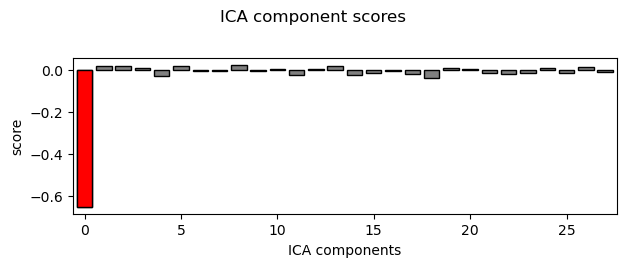

In [105]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

In [106]:
ica.plot_sources(raw_mon)

Creating RawArray with float64 data, n_channels=29, n_times=921600
    Range : 0 ... 921599 =      0.000 ...  3599.996 secs
Ready.


In [107]:
ica.exclude

[0, 1]

In [108]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 2 ICA components
    Projecting back using 29 PCA components


In [109]:
del  ica

In [110]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [111]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 533 samples (2.082 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


In [112]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [13]:
#Get the events
# # Extract events and event_id mapping from annotations
# events, event_id = mne.events_from_annotations(raw_downsampled)

In [113]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [114]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [920832,      0,      0],
        [921024,      0,      0],
        [921216,      0,      0]]),
 4799)

In [ ]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=500e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
4799 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4799 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['Fp1', 'CP2']
    Rejecting  epoch based on EEG : ['Fp1', 'CP2']
    Rejecting  epoch based on EEG : ['CP2', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'CP2']
    Rejecting  epoch based on EEG : ['Fp1', 'CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : 

In [ ]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=200e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

In [40]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [42]:
# with mne.viz.use_browser_backend("matplotlib"):
#     raw_downsampled.plot(events=epochs.events)

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
['2', 'SPO2']


In [41]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

In [44]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN03_epochs1-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN03_1.csv")

In [120]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN03_epochs1-epo.fif', overwrite=True)

Overwriting existing file.


## PN03_2


In [7]:
all_edf_file_path[7] 

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN03\\PN03-2.edf'

In [8]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[7],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN03\PN03-2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 20776959  =      0.000 ... 40579.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 35 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2016-01-01 21:31:04 UTC
 nchan: 35
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [9]:
raw = Seizure_annotation(raw, "21.31.04",["31.13.05"],["31.15.18"])

In [10]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [11]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  34921.0
Segment_start:  33121.0


In [12]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [13]:
raw_segment.set_meas_date(None)

<RawEDF | PN03-2.edf, 35 x 1843201 (3600.0 s), ~492.2 MB, data loaded>

In [14]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=35, n_times=1843201
    Range : 0 ... 1843200 =      0.000 ...  3600.000 secs
Ready.


In [15]:
new_raw.plot()

In [15]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [16]:
new_raw.set_annotations(new_annotations)

<RawArray | 35 x 1843201 (3600.0 s), ~492.2 MB, data loaded>

In [17]:
new_raw.plot()

Using qt as 2D backend.


Channels marked as bad:
none


In [19]:
raw_ref = set_reference(new_raw)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13020\2217041783.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [20]:
del raw

In [21]:

raw_mon = SetMontage(raw_ref)

In [24]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 112.0s.


<ICA | raw data decomposition, method: fastica (fit in 66 iterations on 1843201 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



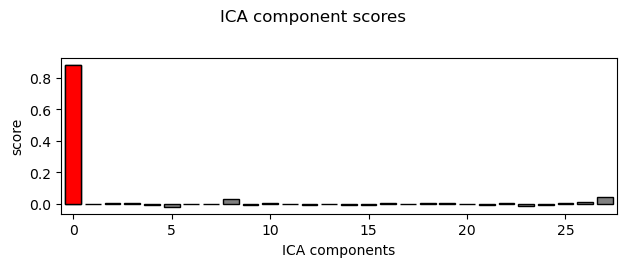

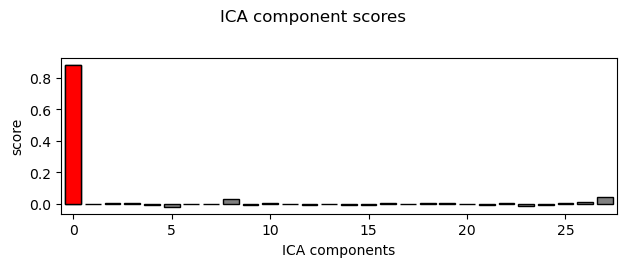

In [25]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold= 'auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

In [26]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [27]:
del raw_mon, raw_ref

Using matplotlib as 2D backend.


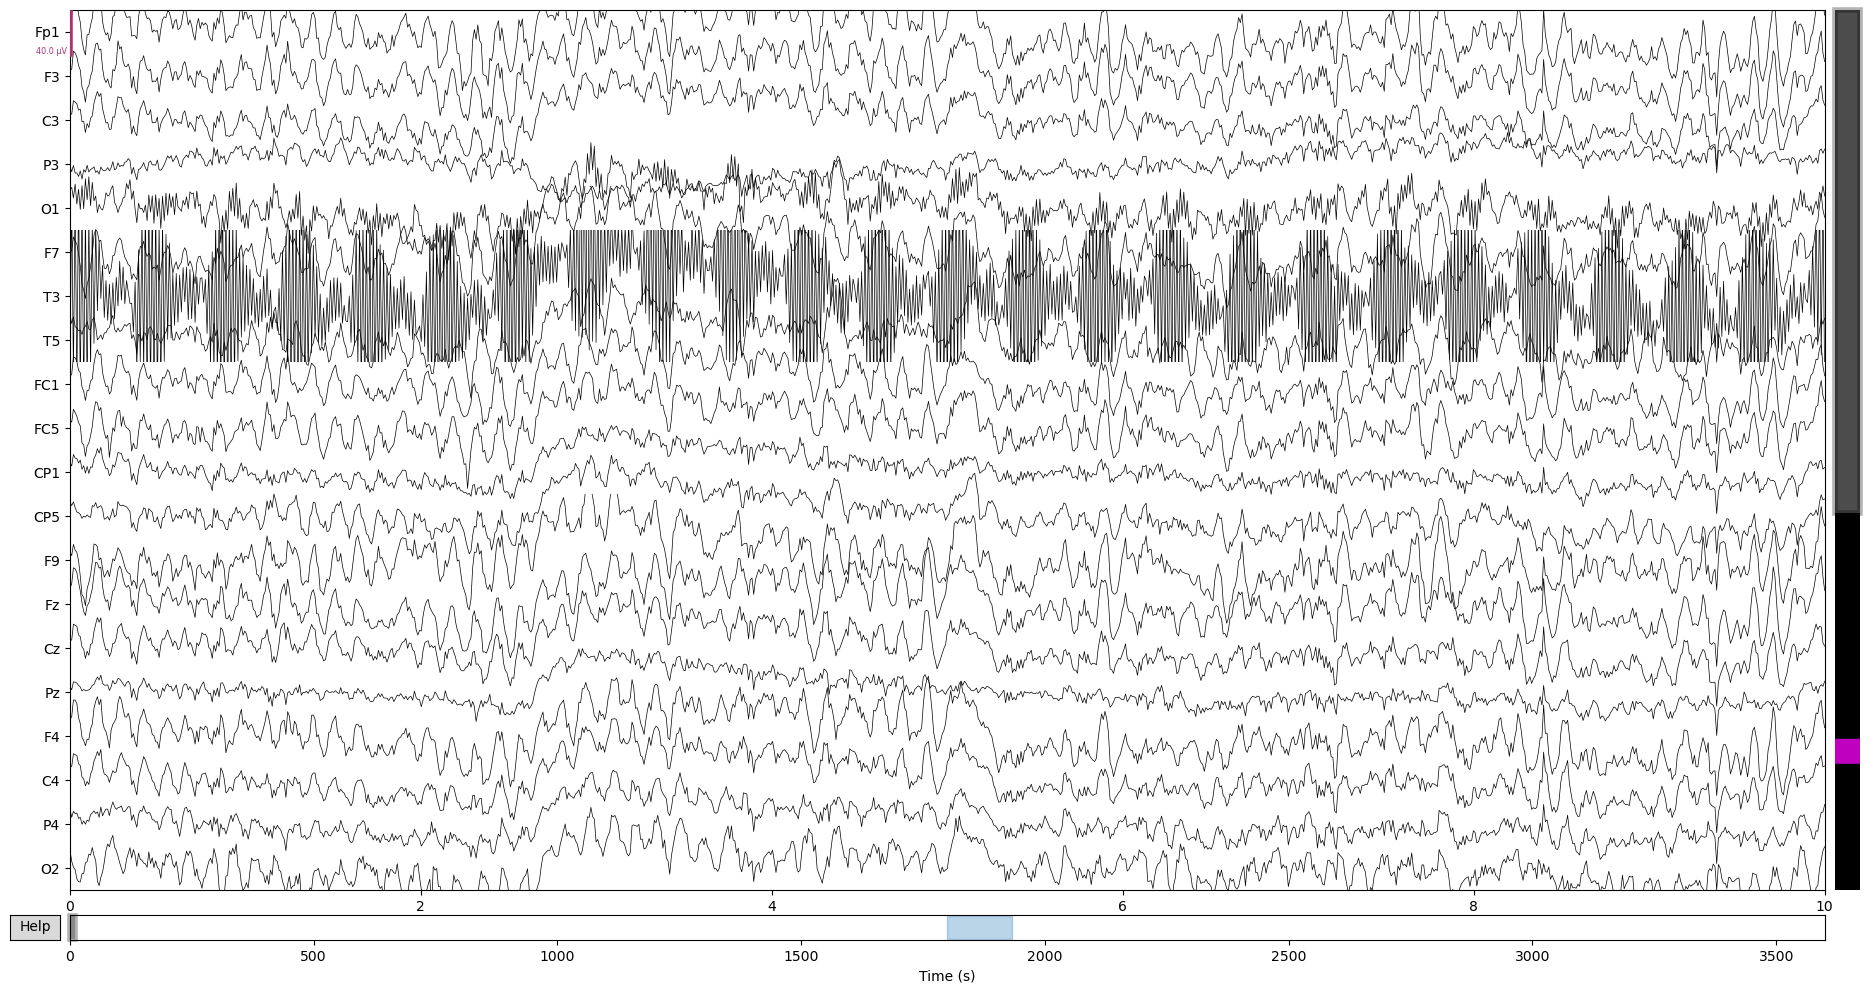

Using qt as 2D backend.


In [28]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

In [30]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_ica.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


In [31]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [13]:
#Get the events
# # Extract events and event_id mapping from annotations
# events, event_id = mne.events_from_annotations(raw_downsampled)

In [32]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [33]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [920832,      0,      0],
        [921024,      0,      0],
        [921216,      0,      0]]),
 4799)

In [39]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=500e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
4799 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4799 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['F8', 'T4', 'F10']
    Rejecting  epoch based on EEG : ['Fp1', 'Fz', 'T4', 'F10']
    Rejecting  epoch based on EEG : ['F7', 'F10']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'C3', 'P3', 'O1', 'F7', 'T3', 'T5', 'FC1', 'FC5', 'CP1', 'CP5', 'F9', 'Fz', 'Cz', 'Pz', 'F4', 'C4', 'P4', 'O2', 'F8', 'T4', 'T6', 'FC2', 'FC6', 'CP2', 'CP6', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'C3', 'P3', 'O1', 'F7', 'T3', 'T5', 'FC1', 'FC5', 'CP1', 'CP5', 'F9', 'Fz', 'Cz', 'Pz', 'F4', 'C4', 'P4', 'O2', 'F

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13020\3200683186.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [40]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

In [41]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [42]:
epochs_combined

<EpochsArray |  2433 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~117.0 MB, data loaded,
 'Seizure': 46
 'Non_Seizure': 2387>

In [43]:
# with mne.viz.use_browser_backend("matplotlib"):
#     raw_downsampled.plot(events=epochs.events)

In [44]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

In [45]:
# epochs

In [40]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN03_epochs2-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN03_2.csv")

In [42]:
# del raw_mon,raw, raw_ref,new_raw, raw_downsampled, raw_ica,raw_segment

In [ ]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN03_epochs2-epo.fif', overwrite=True)

## PN05_2


In [119]:
all_edf_file_path[8]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN05\\PN05-2.edf'

In [121]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[8],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN05\PN05-2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4733439  =      0.000 ...  9244.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 37 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2016-01-01 06:46:02 UTC
 nchan: 37
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [122]:
raw = Seizure_annotation(raw, "06.46.02",["08.45.25"],["08.46.00"])

In [123]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [124]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  7163.0
Segment_start:  5363.0


In [125]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [126]:
raw_segment.set_meas_date(None)

<RawEDF | PN05-2.edf, 37 x 1843201 (3600.0 s), ~520.3 MB, data loaded>

In [127]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=37, n_times=1843201
    Range : 0 ... 1843200 =      0.000 ...  3600.000 secs
Ready.


In [128]:
new_raw.plot()

Channels marked as bad:
none


In [129]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [130]:
new_raw.set_annotations(new_annotations)

<RawArray | 37 x 1843201 (3600.0 s), ~520.3 MB, data loaded>

In [53]:
new_raw.plot()

Channels marked as bad:
none


In [131]:
new_raw.ch_names

['EEG Fp1',
 'EEG F3',
 'EEG C3',
 'EEG P3',
 'EEG O1',
 'EEG F7',
 'EEG T3',
 'EEG T5',
 'EEG Fc1',
 'EEG Fc5',
 'EEG Cp1',
 'EEG Cp5',
 'EEG F9',
 'EEG Fz',
 'EEG Cz',
 'EEG Pz',
 'EEG F4',
 'EEG C4',
 'EEG P4',
 'EEG O2',
 'EEG F8',
 'EEG T4',
 'EEG T6',
 'EEG Fc2',
 'EEG Fc6',
 'EEG Cp2',
 'EEG Cp6',
 'EEG F10',
 'EKG EKG',
 'SPO2',
 'HR',
 '1',
 '2',
 'EEG FP2',
 'EEG P9',
 'EEG P10',
 'MK']

In [62]:
new_raw.info


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 37 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: unspecified
 nchan: 37
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [132]:
# Drop the extra channels
new_raw.drop_channels(['EEG P9', 'EEG P10'])

<RawArray | 35 x 1843201 (3600.0 s), ~492.2 MB, data loaded>

In [133]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13020\2217041783.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [134]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 83.7s.


<ICA | raw data decomposition, method: fastica (fit in 46 iterations on 1843201 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



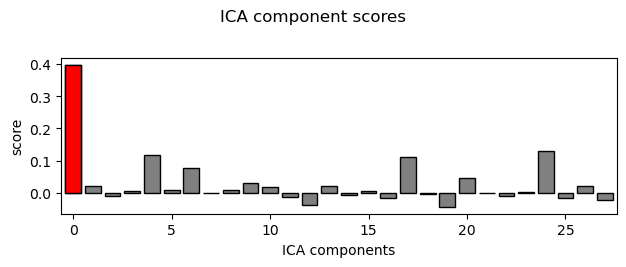

In [135]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold=1.5)
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

In [136]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [73]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [137]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_ica.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


In [75]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [13]:
#Get the events
# # Extract events and event_id mapping from annotations
# events, event_id = mne.events_from_annotations(raw_downsampled)

In [138]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [139]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [920832,      0,      0],
        [921024,      0,      0],
        [921216,      0,      0]]),
 4799)

In [140]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=500e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
4799 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4799 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['Fp1', 'Pz', 'T4', 'T6']
    Rejecting  epoch based on EEG : ['Fp1', 'P3', 'F7', 'CP5', 'Pz', 'P4', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Pz', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rej

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13020\3200683186.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [ ]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

In [ ]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [81]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot(events=epochs.events)

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [141]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

In [142]:
# epochs

In [84]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN05_epochs2-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN05_2.csv")

In [88]:
# del raw_mon,raw, raw_ref,new_raw, raw_downsampled, raw_ica,raw_segment

In [143]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN05_epochs2-epo.fif')

## PN05_3


In [144]:
all_edf_file_path[9]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN05\\PN05-3.edf'

In [145]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[9],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN05\PN05-3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3867647  =      0.000 ...  7553.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 37 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 15.0 Hz
 meas_date: 2016-01-01 06:01:13 UTC
 nchan: 37
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [ ]:
raw = Seizure_annotation(raw, "06.01.23",["07.55.19"],["07.55.49"])

In [ ]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [ ]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




In [ ]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [ ]:
raw_segment.set_meas_date(None)

In [ ]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

In [96]:
new_raw.plot()

Channels marked as bad:
none


In [ ]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [ ]:
new_raw.set_annotations(new_annotations)

In [99]:
new_raw.plot()

Channels marked as bad:
none


In [ ]:
new_raw.ch_names

In [ ]:
new_raw.info


In [102]:
# Drop the extra channels
new_raw.drop_channels(['EEG P9', 'EEG P10'])

<RawArray | 35 x 1289216 (2518.0 s), ~344.3 MB, data loaded>

In [ ]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

In [71]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 86.3s.


<ICA | raw data decomposition, method: fastica (fit in 46 iterations on 1843201 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



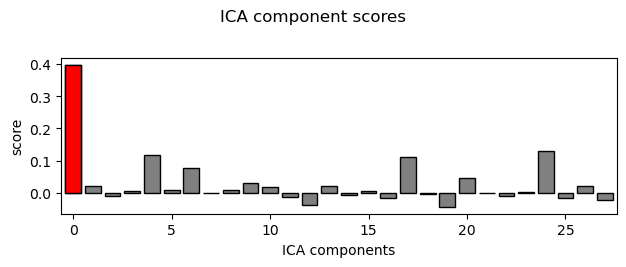

In [72]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold=2)
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

In [73]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [135]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [74]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_ica.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


In [137]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [75]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [76]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [920832,      0,      0],
        [921024,      0,      0],
        [921216,      0,      0]]),
 4799)

In [77]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=500e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
4799 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4799 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['Fp1', 'Pz', 'T4', 'T6']
    Rejecting  epoch based on EEG : ['Fp1', 'P3', 'F7', 'CP5', 'Pz', 'P4', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Pz', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rej

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13020\3200683186.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [78]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

In [79]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [80]:
epochs_combined

<EpochsArray |  2577 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~123.9 MB, data loaded,
 'Seizure': 47
 'Non_Seizure': 2530>

In [150]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot(events=epochs.events)
    

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [151]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
502 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 502 events and 180 original time points ...
288 bad epochs dropped


In [81]:
# epochs

In [82]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN05_epochs3-epo.fif', overwrite=True)

In [153]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN05_epochs3-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN05_3.csv")

In [154]:
del raw_mon,raw, raw_ref,new_raw, raw_downsampled, raw_ica,raw_segment

## PN05_4
Highpass	1.59 Hz
Lowpass	15.00 Hz


In [7]:
all_edf_file_path[10]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN05\\PN05-4.edf'

In [8]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[10],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN05\PN05-4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2523135  =      0.000 ...  4927.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 37 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 15.0 Hz
 meas_date: 2016-01-01 06:38:35 UTC
 nchan: 37
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [9]:
raw = Seizure_annotation(raw, "06.38.35",["07.38.43"],["07.39.22"])

In [10]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 37 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 15.0 Hz
 meas_date: 2016-01-01 06:38:35 UTC
 nchan: 37
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [11]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [12]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  3608.0
Segment_start:  1808.0


In [13]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [14]:
raw_segment.set_meas_date(None)

<RawEDF | PN05-4.edf, 37 x 1597440 (3120.0 s), ~451.0 MB, data loaded>

In [15]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=37, n_times=1597440
    Range : 0 ... 1597439 =      0.000 ...  3119.998 secs
Ready.


In [16]:
new_raw.plot()

Using qt as 2D backend.


In [17]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [18]:
new_raw.set_annotations(new_annotations)

<RawArray | 37 x 1597440 (3120.0 s), ~451.0 MB, data loaded>

In [19]:
new_raw.plot()

In [20]:
new_raw.ch_names

['EEG Fp1',
 'EEG F3',
 'EEG C3',
 'EEG P3',
 'EEG O1',
 'EEG F7',
 'EEG T3',
 'EEG T5',
 'EEG Fc1',
 'EEG Fc5',
 'EEG Cp1',
 'EEG Cp5',
 'EEG F9',
 'EEG Fz',
 'EEG Cz',
 'EEG Pz',
 'EEG F4',
 'EEG C4',
 'EEG P4',
 'EEG O2',
 'EEG F8',
 'EEG T4',
 'EEG T6',
 'EEG Fc2',
 'EEG Fc6',
 'EEG Cp2',
 'EEG Cp6',
 'EEG F10',
 'EKG EKG',
 'SPO2',
 'HR',
 '1',
 '2',
 'EEG FP2',
 'EEG P9',
 'EEG P10',
 'MK']

Channels marked as bad:
none
Channels marked as bad:
none


In [21]:
new_raw.info


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 37 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 15.0 Hz
 meas_date: unspecified
 nchan: 37
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [22]:
# Drop the extra channels
new_raw.drop_channels(['EEG P9', 'EEG P10'])

<RawArray | 35 x 1597440 (3120.0 s), ~426.6 MB, data loaded>

In [23]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7176\2217041783.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [24]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 79.4s.


<ICA | raw data decomposition, method: fastica (fit in 50 iterations on 1597440 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [25]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [26]:
ica.plot_sources(raw_mon)

Creating RawArray with float64 data, n_channels=29, n_times=1597440
    Range : 0 ... 1597439 =      0.000 ...  3119.998 secs
Ready.


In [27]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [73]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [28]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_ica.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


In [75]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [13]:
#Get the events
# # Extract events and event_id mapping from annotations
# events, event_id = mne.events_from_annotations(raw_downsampled)

In [29]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [30]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [797952,      0,      0],
        [798144,      0,      0],
        [798336,      0,      0]]),
 4159)

In [ ]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=500e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
4159 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4159 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['Fp1', 'O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['Fp1', 'O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on

In [ ]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

In [ ]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [80]:
epochs

<Epochs |  388 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~18.7 MB, data loaded,
 'Non_Seizure': 386
 'Seizure': 2>

In [81]:
# with mne.viz.use_browser_backend("matplotlib"):
#     raw_downsampled.plot(events=epochs.events)

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [ ]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

In [83]:
epochs

<Epochs |  393 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~18.9 MB, data loaded,
 'Non_Seizure': 386
 'Seizure': 7>

In [84]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN05_epochs4-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN05_4.csv")

In [ ]:
# del raw_mon,raw, raw_ref,new_raw, raw_downsampled, raw_ica,raw_segment

In [33]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN05_epochs4-epo.fif', overwrite=True)

Overwriting existing file.


## PN06-2


In [7]:
all_edf_file_path[12]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN06\\PN06-2.edf'

In [8]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[12],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN06\PN06-2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6461439  =      0.000 ... 12619.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 37 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 30.0 Hz
 meas_date: 2016-01-01 21:11:29 UTC
 nchan: 37
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [9]:
raw = Seizure_annotation(raw, "21.11.29",["23.39.09"],["23.40.18"])

In [10]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [11]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  8860.0
Segment_start:  7060.0


In [12]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [13]:
raw_segment.set_meas_date(None)

<RawEDF | PN06-2.edf, 37 x 1843201 (3600.0 s), ~520.3 MB, data loaded>

In [14]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=37, n_times=1843201
    Range : 0 ... 1843200 =      0.000 ...  3600.000 secs
Ready.


In [19]:
# new_raw.plot()

In [15]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [16]:
new_raw.set_annotations(new_annotations)

<RawArray | 37 x 1843201 (3600.0 s), ~520.3 MB, data loaded>

In [22]:
with mne.viz.use_browser_backend('matplotlib'):
    raw.plot()

In [23]:
# new_raw = raw

In [17]:
new_raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 37 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 30.0 Hz
 meas_date: unspecified
 nchan: 37
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [27]:
raw.ch_names

['Fp1',
 'F3',
 'C3',
 'P3',
 'O1',
 'F7',
 'T3',
 'T5',
 'FC1',
 'FC5',
 'CP1',
 'CP5',
 'F9',
 'Fz',
 'Cz',
 'Pz',
 'F4',
 'C4',
 'P4',
 'O2',
 'F8',
 'T4',
 'T6',
 'FC2',
 'FC6',
 'CP2',
 'CP6',
 'F10',
 'EKG EKG',
 'SPO2',
 'HR',
 '1',
 '2',
 'Fp2',
 'MK']

In [19]:
# Drop the extra channels
new_raw.drop_channels(['EEG P9', 'EEG P10'])

<RawArray | 35 x 1843201 (3600.0 s), ~492.2 MB, data loaded>

In [22]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


In [23]:
raw_mon.info

<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, F3, C3, P3, O1, F7, T3, T5, FC1, FC5, CP1, CP5, F9, Fz, Cz, ...
 chs: 29 EEG, 1 ECG, 5 misc
 custom_ref_applied: True
 dig: 32 items (3 Cardinal, 29 EEG)
 highpass: 0.5 Hz
 lowpass: 30.0 Hz
 meas_date: unspecified
 nchan: 35
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [24]:
# Filter and downsample data
raw_downsampled = raw_mon.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


In [25]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_downsampled)

Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 44.3s.


<ICA | raw data decomposition, method: fastica (fit in 48 iterations on 921600 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [26]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_downsampled,method="correlation", threshold="auto")
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [27]:
ica.plot_sources(raw_downsampled)

Creating RawArray with float64 data, n_channels=29, n_times=921600
    Range : 0 ... 921599 =      0.000 ...  3599.996 secs
Ready.
Using qt as 2D backend.


In [28]:
raw_ica = ica.apply(raw_downsampled.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [67]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [68]:
# # Filter and downsample data
# raw_downsampled = raw_ica.filter(1.59,30)
# raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

In [28]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [13]:
#Get the events
# # Extract events and event_id mapping from annotations
# events, event_id = mne.events_from_annotations(raw_downsampled)

In [29]:
events,event_ids = events_seizure_nonseizure(raw_ica)

In [30]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [920832,      0,      0],
        [921024,      0,      0],
        [921216,      0,      0]]),
 4799)

In [31]:
epochs = mne.Epochs(raw_ica, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=500e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
4799 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4799 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'F9', 'F8', 'F10']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejectin

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6816\721805279.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [24]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

In [ ]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [32]:
epochs_combined.get_data().shape

(3737, 35, 180)

In [33]:
epochs_combined.pick_types(eeg=True).get_data().shape

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


(3737, 29, 180)

In [34]:
# with mne.viz.use_browser_backend("matplotlib"):
#     raw_downsampled.plot(events=epochs.events)

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [35]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
2522 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 2522 events and 180 original time points ...
1542 bad epochs dropped


In [34]:
epochs

<Epochs |  4798 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~230.7 MB, data loaded,
 'Non_Seizure': 4705
 'Seizure': 93>

In [35]:
epochs_combined

<EpochsArray |  3737 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~148.9 MB, data loaded,
 'Seizure': 93
 'Non_Seizure': 3644>

In [37]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN06_epochs2-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN06_2.csv")

In [36]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN06_epochs2-epo.fif', overwrite=True)

Overwriting existing file.


## PN06-3



In [75]:
all_edf_file_path[13]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN06\\PN06-3.edf'

In [37]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[13],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN06\PN06-3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4188159  =      0.000 ...  8179.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 37 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2016-01-01 06:25:51 UTC
 nchan: 37
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [38]:
raw = Seizure_annotation(raw, "06.25.51",["08.10.26"],["08.11.08"])

In [39]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [40]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  6275.0
Segment_start:  4475.0


In [41]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [42]:
raw_segment.set_meas_date(None)

<RawEDF | PN06-3.edf, 37 x 1843201 (3600.0 s), ~520.3 MB, data loaded>

In [43]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=37, n_times=1843201
    Range : 0 ... 1843200 =      0.000 ...  3600.000 secs
Ready.


In [47]:
new_raw.plot()

Channels marked as bad:
none


In [44]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [45]:
new_raw.set_annotations(new_annotations)

<RawArray | 37 x 1843201 (3600.0 s), ~520.3 MB, data loaded>

In [46]:
# Drop the extra channels
new_raw.drop_channels(['EEG P9', 'EEG P10'])

<RawArray | 35 x 1843201 (3600.0 s), ~492.2 MB, data loaded>

In [47]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6816\2217041783.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [48]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 117.4s.


<ICA | raw data decomposition, method: fastica (fit in 62 iterations on 1843201 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [49]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold="auto")
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [50]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [55]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [51]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


In [58]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [13]:
#Get the events
# # Extract events and event_id mapping from annotations
# events, event_id = mne.events_from_annotations(raw_downsampled)

In [52]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [53]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [920832,      0,      0],
        [921024,      0,      0],
        [921216,      0,      0]]),
 4799)

In [ ]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=500e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])

Not setting metadata
4799 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4799 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['P3', 'CP1', 'Cz', 'Pz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz', 'Pz']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'C3', 'P3', 'O1', 'F7', 'T3', 'T5', 'FC1', 'FC5', 'CP1', 'CP5', 'F9', 'Fz', 'Cz', 'Pz', 'F4', 'C4', 'P4', 'O2', 'F8', 'T4', 'FC2', 'FC6', 'CP2', 'Fp2']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['F3', 'FC1']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'C3', 'P3', 'O1', 'T5', 'FC1', 'CP1', 'CP5', 'Fz', 'Cz', 'Pz', 'P4', 'O2', 'FC2', 'CP2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'C3', 'P3', 'O1', 'F7', 'T3', 'T5', 'FC1', 'FC5', 'CP1', 'CP5', 'Fz', 'Cz', 'Pz', 'F4', 'C4',

In [ ]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

In [ ]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [56]:
epochs_combined

<EpochsArray |  622 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~29.9 MB, data loaded,
 'Seizure': 57
 'Non_Seizure': 565>

In [65]:
# with mne.viz.use_browser_backend("matplotlib"):
#     raw_downsampled.plot(events=epochs.events)

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [91]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

In [67]:
# epochs

<Epochs |  245 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~11.8 MB, data loaded,
 'Non_Seizure': 235
 'Seizure': 10>

In [68]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN06_epochs3-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN06_3.csv")

In [57]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN06_epochs3-epo.fif', overwrite=True)

Overwriting existing file.


## PN06-4


In [45]:
all_edf_file_path[14]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN06\\PN06-4.edf'

In [58]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[14],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN06\PN06-4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3596799  =      0.000 ...  7024.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 37 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2016-01-01 11:16:09 UTC
 nchan: 37
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [59]:
raw = Seizure_annotation(raw, "11.16.09",["12.55.08"],["12.56.11"])

In [60]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [61]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  5939.0
Segment_start:  4139.0


In [62]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [64]:
raw_segment.set_meas_date(None)

<RawEDF | PN06-4.edf, 37 x 1477632 (2886.0 s), ~417.1 MB, data loaded>

In [65]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=37, n_times=1477632
    Range : 0 ... 1477631 =      0.000 ...  2885.998 secs
Ready.


In [77]:
# new_raw.plot()

Channels marked as bad:
none


In [66]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [67]:
new_raw.set_annotations(new_annotations)

<RawArray | 37 x 1477632 (2886.0 s), ~417.1 MB, data loaded>

In [80]:
# with mne.viz.use_browser_backend('matplotlib'):
#     raw.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [68]:
# Drop the extra channels
new_raw.drop_channels(['EEG P9', 'EEG P10'])

<RawArray | 35 x 1477632 (2886.0 s), ~394.6 MB, data loaded>

In [69]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6816\2217041783.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [70]:
# Filter and downsample data
raw_downsampled = raw_mon.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


In [71]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_downsampled)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 61.1s.


<ICA | raw data decomposition, method: fastica (fit in 73 iterations on 738816 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [73]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_downsampled,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [109]:
ica.plot_sources(raw_downsampled)

Creating RawArray with float64 data, n_channels=29, n_times=1798400
    Range : 0 ... 1798399 =      0.000 ...  7024.996 secs
Ready.


In [74]:
raw_ica = ica.apply(raw_downsampled.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [69]:
# with mne.viz.use_browser_backend("matplotlib"):
    # raw_ica.plot()

In [70]:
# with mne.viz.use_browser_backend("matplotlib"):
#     raw_downsampled.plot()

In [75]:
events,event_ids = events_seizure_nonseizure(raw_ica)

In [76]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [738048,      0,      0],
        [738240,      0,      0],
        [738432,      0,      0]]),
 3847)

In [77]:
epochs = mne.Epochs(raw_ica, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
3847 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 3847 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['F7', 'F9', 'F8', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'F7', 'F9', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  ep

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6816\3898594584.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [ ]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

In [57]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [78]:
epochs_combined

<EpochsArray |  2497 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~120.1 MB, data loaded,
 'Seizure': 85
 'Non_Seizure': 2412>

In [68]:
# with mne.viz.use_browser_backend("matplotlib"):
#     raw_downsampled.plot(events=epochs.events)

In [67]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

In [71]:
# epochs

In [80]:
epochs_combined

<EpochsArray |  2497 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~99.5 MB, data loaded,
 'Seizure': 85
 'Non_Seizure': 2412>

In [79]:
epochs_combined.pick_types(eeg=True).get_data().shape

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


(2497, 29, 180)

In [121]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN06_epochs4-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN06_4.csv")

In [81]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN06_epochs4-epo.fif', overwrite=True)

Overwriting existing file.


In [82]:
del raw_mon,raw, raw_ref,new_raw, raw_downsampled, raw_ica,raw_segment

## PN06-5


In [119]:
all_edf_file_path[15]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN06\\PN06-5.edf'

In [120]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[15],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN06\PN06-5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3083263  =      0.000 ...  6021.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 37 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2016-01-01 13:24:41 UTC
 nchan: 37
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [121]:
raw = Seizure_annotation(raw, "13.24.41",["14.44.24"],["14.45.08 "])

In [122]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [138]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  4783.0
Segment_start:  2983.0


In [139]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [140]:
raw_segment.set_meas_date(None)

<RawEDF | PN06-5.edf, 37 x 1555968 (3039.0 s), ~439.3 MB, data loaded>

In [141]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=37, n_times=1555968
    Range : 0 ... 1555967 =      0.000 ...  3038.998 secs
Ready.


In [135]:
new_raw.plot()

Channels marked as bad:
none


In [142]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [143]:
new_raw.set_annotations(new_annotations)

<RawArray | 37 x 1555968 (3039.0 s), ~439.3 MB, data loaded>

In [134]:
with mne.viz.use_browser_backend('matplotlib'):
    raw.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [123]:
# Drop the extra channels
raw.drop_channels(['EEG P9', 'EEG P10'])

<RawEDF | PN06-5.edf, 35 x 3083264 (6022.0 s), ~823.4 MB, data loaded>

In [124]:
raw_ref = set_reference(raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7176\2217041783.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [125]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 199.1s.


<ICA | raw data decomposition, method: fastica (fit in 65 iterations on 3083264 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [126]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.6s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [127]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [149]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [128]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s


In [151]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [129]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [130]:
events, len(events)

(array([[      0,       0,       0],
        [    192,       0,       0],
        [    384,       0,       0],
        ...,
        [1540800,       0,       0],
        [1540992,       0,       0],
        [1541184,       0,       0]]),
 8028)

In [ ]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=500e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
8028 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 8028 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['Fp1', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'O1', 'F7', 'T5', 'F9', 'Fz', 'F4', 'O2', 'F8', 'T6', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'F7', 'FC1', 'FC5', 'Fz', 'F4', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F4', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'F7', 'FC1', 'FC5', 'Fz', 'F4', 'F8', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['P3', 'O1', 'F7', 'T3', 'T5', 'CP1', 'CP5', 'F9', 'O2', 'F8', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['P3', 'O1']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'P3', 'O1', 'F7', 'T5', 'FC5', 'CP5', 'F9', 'O2

In [137]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

In [ ]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [136]:
epochs_combined

<EpochsArray |  3951 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~189.9 MB, data loaded,
 'Seizure': 48
 'Non_Seizure': 3903>

In [138]:
# with mne.viz.use_browser_backend("matplotlib"):
#     raw_downsampled.plot(events=epochs.events)

In [139]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

In [140]:
# epochs

In [160]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN06_epochs5-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN06_5.csv")

In [154]:
del raw_mon,raw, raw_ref, raw_downsampled, raw_ica,raw_segment

NameError: name 'raw_ica' is not defined

In [141]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN06_epochs5-epo.fif', overwrite=True)

## PN07-1


In [7]:
all_edf_file_path[16]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN07\\PN07-1.edf'

In [8]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[16],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN07\PN07-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16101375  =      0.000 ... 31447.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 45 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2017-01-01 23:18:10 UTC
 nchan: 45
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [146]:
with mne.viz.use_browser_backend("matplotlib"):
    raw.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [9]:
raw = Seizure_annotation(raw, "23.18.10",["29.25.49"],["29.26.51"])

In [10]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [11]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  22059.0
Segment_start:  20259.0


In [12]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [13]:
raw_segment.set_meas_date(None)

<RawEDF | PN07-1.edf, 45 x 1843201 (3600.0 s), ~632.9 MB, data loaded>

In [14]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=45, n_times=1843201
    Range : 0 ... 1843200 =      0.000 ...  3600.000 secs
Ready.


In [190]:
new_raw.plot()

Channels marked as bad:
none


In [15]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [16]:
new_raw.set_annotations(new_annotations)

<RawArray | 45 x 1843201 (3600.0 s), ~632.9 MB, data loaded>

In [193]:
with mne.viz.use_browser_backend('matplotlib'):
    raw.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [17]:
# Drop the extra channels
new_raw.drop_channels(['EEG P9', 'EEG P10','B', 'C', 'D', 'PLET', '61', '62', '63', '64'])

<RawArray | 35 x 1843201 (3600.0 s), ~492.2 MB, data loaded>

In [18]:
# Filter and downsample data
raw_downsampled = new_raw.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


In [157]:
del raw_ref

In [19]:
raw_ref = set_reference(raw_downsampled)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6992\2217041783.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [20]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 64.2s.


<ICA | raw data decomposition, method: fastica (fit in 74 iterations on 921600 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [21]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [22]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [199]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [202]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [23]:
events,event_ids = events_seizure_nonseizure(raw_ica)

In [24]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [920832,      0,      0],
        [921024,      0,      0],
        [921216,      0,      0]]),
 4799)

In [ ]:
epochs = mne.Epochs(raw_ica, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=500e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
4799 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4799 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'FC1', 'F8', '

In [ ]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

In [ ]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [ ]:
epochs_combined

In [209]:
# with mne.viz.use_browser_backend("matplotlib"):
#     raw_downsampled.plot(events=epochs.events)

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [164]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

In [211]:
# epochs

<Epochs |  393 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~18.9 MB, data loaded,
 'Non_Seizure': 379
 'Seizure': 14>

In [213]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN07_epochs1-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN07_1.csv")

In [214]:
del raw_mon,raw, raw_ref,new_raw, raw_downsampled, raw_ica,raw_segment

In [166]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN07_epochs1-epo.fif', overwrite=True)

## PN10-1


In [7]:
all_edf_file_path[20]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN10\\PN10-1.edf'

In [8]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[20],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN10\PN10-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5110783  =      0.000 ...  9981.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 45 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2017-01-01 05:40:05 UTC
 nchan: 45
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [19]:
with mne.viz.use_browser_backend("matplotlib"):
    raw.plot()

Channels marked as bad:
none


In [9]:
raw = Seizure_annotation(raw, "05.40.05",["07.45.50"],["07.46.59"])

In [21]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [22]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  7545.0
Segment_start:  5745.0


In [23]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [24]:
raw_segment.set_meas_date(None)

<RawEDF | PN10-1.edf, 45 x 1843201 (3600.0 s), ~632.9 MB, data loaded>

In [25]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=45, n_times=1843201
    Range : 0 ... 1843200 =      0.000 ...  3600.000 secs
Ready.


In [26]:
new_raw.plot()

<MNEBrowseFigure size 1900x1025 with 4 Axes>

Channels marked as bad:
none


In [27]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [28]:
new_raw.set_annotations(new_annotations)

<RawArray | 45 x 1843201 (3600.0 s), ~632.9 MB, data loaded>

In [29]:
with mne.viz.use_browser_backend('matplotlib'):
    raw.plot()

Channels marked as bad:
none


In [10]:
# Drop the extra channels
raw.drop_channels(['EEG P9', 'EEG P10','B', 'C', 'D', 'PLET', '61', '62', '63', '64'])

<RawEDF | PN10-1.edf, 35 x 5110784 (9982.0 s), ~1.33 GB, data loaded>

In [11]:
raw_ref = set_reference(raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4984\2217041783.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [12]:
# Filter and downsample data
raw_downsampled = raw_mon.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.3s


In [13]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_downsampled)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 214.4s.


<ICA | raw data decomposition, method: fastica (fit in 87 iterations on 2555392 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [16]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_downsampled,method="correlation", threshold= 'auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [17]:
raw_ica = ica.apply(raw_downsampled.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [35]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Channels marked as bad:
none


In [36]:
# # Filter and downsample data
# raw_downsampled = raw_ica.filter(1.59,30)
# raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


In [37]:
# with mne.viz.use_browser_backend("matplotlib"):
#     raw_downsampled.plot()

Channels marked as bad:
none


In [18]:
events,event_ids = events_seizure_nonseizure(raw_ica)

In [19]:
events, len(events)

(array([[      0,       0,       0],
        [    192,       0,       0],
        [    384,       0,       0],
        ...,
        [2554560,       0,       0],
        [2554752,       0,       0],
        [2554944,       0,       0]]),
 13308)

In [ ]:
epochs = mne.Epochs(raw_ica, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
13308 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 13308 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['C3', 'P3', 'O1', 'T3', 'T5', 'FC1', 'FC5', 'CP1', 'CP5', 'F9', 'Pz', 'C4', 'P4', 'O2', 'F8', 'T4', 'T6', 'FC2', 'FC6', 'CP2', 'CP6', 'F10']
    Rejecting  epoch based on EEG : ['Fp1', 'O1', 'F7', 'FC1', 'FC5', 'CP1', 'CP5', 'F9', 'Pz', 'C4', 'P4', 'O2', 'F8', 'T4', 'T6', 'FC2', 'FC6', 'CP2', 'CP6', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Pz', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'C3', 'P3', 'O1', 'F7', 'T3', 'T5', 'FC1', 'FC5', 'CP1', 'CP5', 'F9', 'Fz', 'Cz', 'Pz', 'F4', 'C4', 'P4', 'O2', 'F8', 'T4', 'T6', 'FC2

In [40]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

Not setting metadata
718 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 718 events and 180 original time points ...
1 bad epochs dropped


In [ ]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [31]:
epochs

<Epochs |  13307 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~639.6 MB, data loaded,
 'Non_Seizure': 13214
 'Seizure': 93>

In [35]:
epochs_combined

<EpochsArray |  9933 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~477.5 MB, data loaded,
 'Seizure': 73
 'Non_Seizure': 9860>

In [43]:
# with mne.viz.use_browser_backend("matplotlib"):
#     raw_downsampled.plot(events=epochs.events)

Channels marked as bad:
none


In [44]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
718 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 718 events and 180 original time points ...
194 bad epochs dropped


In [ ]:
# epochs

In [46]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN10_epochs1-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN10_1.csv")

In [38]:
del raw_mon,raw, raw_ref, raw_downsampled, raw_ica,raw_segment

NameError: name 'raw_mon' is not defined

In [36]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN10_epochs1-epo.fif')

## PN10-2


In [7]:
all_edf_file_path[22]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN10\\PN10-2.edf'

In [8]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[22],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN10\PN10-2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4379647  =      0.000 ...  8553.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 45 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2017-01-01 09:30:15 UTC
 nchan: 45
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [9]:
# with mne.viz.use_browser_backend("matplotlib"):
#     raw.plot()

In [10]:
raw = Seizure_annotation(raw, "09.30.15",["11.40.13"],["11.41.04"])

In [11]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [12]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  7798.0
Segment_start:  5998.0


In [13]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [14]:
raw_segment.set_meas_date(None)

<RawEDF | PN10-2.edf, 45 x 1308672 (2556.0 s), ~449.3 MB, data loaded>

In [15]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=45, n_times=1308672
    Range : 0 ... 1308671 =      0.000 ...  2555.998 secs
Ready.


In [60]:
# new_raw.plot()

<MNEBrowseFigure size 958x1018 with 4 Axes>

Channels marked as bad:
none


In [16]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [17]:
new_raw.set_annotations(new_annotations)

<RawArray | 45 x 1308672 (2556.0 s), ~449.3 MB, data loaded>

In [54]:
# with mne.viz.use_browser_backend('matplotlib'):
#     raw.plot()

Channels marked as bad:
none


In [18]:
# Drop the extra channels
new_raw.drop_channels(['EEG P9', 'EEG P10','B', 'C', 'D', 'PLET', '61', '62', '63', '64'])

<RawArray | 35 x 1308672 (2556.0 s), ~349.5 MB, data loaded>

In [19]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\2217041783.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [20]:
# Filter and downsample data
raw_downsampled = raw_mon.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


In [21]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_downsampled)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components


C:\Users\Administrator\anaconda3\envs\mne\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA took 658.8s.


<ICA | raw data decomposition, method: fastica (fit in 1000 iterations on 654336 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [22]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_downsampled,method="correlation", threshold= 'auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [23]:
ica.plot_sources(raw_downsampled)

Creating RawArray with float64 data, n_channels=29, n_times=654336
    Range : 0 ... 654335 =      0.000 ...  2555.996 secs
Ready.
Using qt as 2D backend.


In [24]:
raw_ica = ica.apply(raw_downsampled.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 2 ICA components
    Projecting back using 29 PCA components


In [65]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Channels marked as bad:
none


In [23]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Using matplotlib as 2D backend.
Channels marked as bad:
none


In [25]:
events,event_ids = events_seizure_nonseizure(raw_ica)

In [26]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [653568,      0,      0],
        [653760,      0,      0],
        [653952,      0,      0]]),
 3407)

In [27]:
epochs = mne.Epochs(raw_ica, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=120e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
3407 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 3407 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Re

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\4199454533.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [72]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=200e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

In [50]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [28]:
epochs

<Epochs |  3406 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~163.8 MB, data loaded,
 'Non_Seizure': 3337
 'Seizure': 69>

In [29]:
epochs_combined

<EpochsArray |  2896 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~139.2 MB, data loaded,
 'Seizure': 69
 'Non_Seizure': 2827>

In [75]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot(events=epochs.events)

Channels marked as bad:
none


In [82]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
510 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 510 events and 180 original time points ...
216 bad epochs dropped


In [38]:
epochs

<Epochs |  11403 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~548.1 MB, data loaded,
 'Non_Seizure': 11334
 'Seizure': 69>

In [84]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN10_epochs2-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN10_2.csv")

In [31]:
del raw_mon,raw, raw_ref, raw_downsampled, raw_ica,raw_segment

In [30]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN10_epochs2-epo.fif',overwrite=True)

Overwriting existing file.


## PN10-3


In [7]:
all_edf_file_path[23]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN10\\PN10-3.edf'

In [8]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[23],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN10\PN10-3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4461055  =      0.000 ...  8712.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 45 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 30.0 Hz
 meas_date: 2017-01-01 13:33:18 UTC
 nchan: 45
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [88]:
with mne.viz.use_browser_backend("matplotlib"):
    raw.plot()

Channels marked as bad:
none


In [9]:
raw = Seizure_annotation(raw, "13.33.18",["15.43.53"],["15.45.02"])

In [10]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [11]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  7835.0
Segment_start:  6035.0


In [12]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [13]:
raw_segment.set_meas_date(None)

<RawEDF | PN10-3.edf, 45 x 1371136 (2678.0 s), ~470.8 MB, data loaded>

In [14]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=45, n_times=1371136
    Range : 0 ... 1371135 =      0.000 ...  2677.998 secs
Ready.


In [15]:
new_raw.plot()

Using qt as 2D backend.


In [16]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


Channels marked as bad:
none


In [17]:
new_raw.set_annotations(new_annotations)

<RawArray | 45 x 1371136 (2678.0 s), ~470.8 MB, data loaded>

In [90]:
with mne.viz.use_browser_backend('matplotlib'):
    raw.plot()

Channels marked as bad:
none


In [18]:
# Drop the extra channels
new_raw.drop_channels(['EEG P9', 'EEG P10','B', 'C', 'D', 'PLET', '61', '62', '63', '64'])

<RawArray | 35 x 1371136 (2678.0 s), ~366.2 MB, data loaded>

In [19]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10160\2217041783.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [20]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 57.7s.


<ICA | raw data decomposition, method: fastica (fit in 44 iterations on 1371136 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [21]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [22]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 2 ICA components
    Projecting back using 29 PCA components


In [23]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [24]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


In [25]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [26]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [27]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [684864,      0,      0],
        [685056,      0,      0],
        [685248,      0,      0]]),
 3570)

In [28]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
3570 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 3570 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['FC5', 'FC6']
    Rejecting  epoch based on EEG : ['FC1', 'FC6', 'CP2']
    Rejecting  epoch based on EEG : ['FC1', 'FC5', 'CP1', 'CP5', 'F9', 'FC2', 'FC6', 'CP2', 'CP6', 'F10']
    Rejecting  epoch based on EEG : ['FC6', 'CP6']
    Rejecting  epoch based on EEG : ['F9', 'FC6']
    Rejecting  epoch based on EEG : ['FC6', 'CP6']
    Rejecting  epoch based on EEG : ['F9', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'C3', 'P3', 'O1', 'F7', 'T3', 'T5', 'FC1', 'CP1', 'CP5', 'F9', 'Fz', 'Cz', 'Pz', 'F4', 'C4', 'P4', 'O2', 'F8', 'T4', 'T6', 'FC2', 'FC6', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['CP5', 'FC6']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'P3', '

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10160\1052167795.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [109]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=200e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

Not setting metadata
534 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 534 events and 180 original time points ...
1 bad epochs dropped


In [29]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [30]:
epochs

<Epochs |  3569 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~171.6 MB, data loaded,
 'Non_Seizure': 3476
 'Seizure': 93>

In [ ]:
epochs_combined

In [112]:
# with mne.viz.use_browser_backend("matplotlib"):
#     raw_downsampled.plot(events=epochs.events)

Channels marked as bad:
none


In [ ]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

In [ ]:
# epochs

In [115]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN10_epochs3-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN10_3.csv")

In [35]:
del raw_mon,raw, raw_ref,new_raw, raw_downsampled, raw_ica,raw_segment

In [34]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN10_epochs3-epo.fif')

## PN10-4


In [7]:
all_edf_file_path[24]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN10\\PN10-4.5.6.edf'

In [8]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[24],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN10\PN10-4.5.6.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8523775  =      0.000 ... 16647.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 45 EEG
 custom_ref_applied: False
 highpass: 0.2 Hz
 lowpass: 50.0 Hz
 meas_date: 2017-01-01 12:11:21 UTC
 nchan: 45
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [38]:
with mne.viz.use_browser_backend("matplotlib"):
    raw.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [9]:
raw = Seizure_annotation(raw, "12.11.21",["12.49.50"],
                         ["12.49.55"])

In [10]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [11]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  2309.0
Segment_start:  509.0


In [12]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [13]:
raw_segment.set_meas_date(None)

<RawEDF | PN10-4.5.6.edf, 45 x 1843201 (3600.0 s), ~632.9 MB, data loaded>

In [15]:
raw.plot()

<MNEBrowseFigure size 1920x1027 with 4 Axes>

Channels marked as bad:
none


In [14]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=45, n_times=1843201
    Range : 0 ... 1843200 =      0.000 ...  3600.000 secs
Ready.


In [17]:
new_raw.plot()

<MNEBrowseFigure size 1920x1027 with 4 Axes>

Channels marked as bad:
none


In [15]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [16]:
new_raw.set_annotations(new_annotations)

<RawArray | 45 x 1843201 (3600.0 s), ~632.9 MB, data loaded>

In [20]:
with mne.viz.use_browser_backend('matplotlib'):
    new_raw.plot()

Channels marked as bad:
none


In [17]:
# Drop the extra channels
new_raw.drop_channels(['EEG P9', 'EEG P10','B', 'C', 'D', 'PLET', '61', '62', '63', '64'])

<RawArray | 35 x 1843201 (3600.0 s), ~492.2 MB, data loaded>

In [18]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11240\2217041783.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [19]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components


C:\Users\Administrator\anaconda3\envs\mne\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA took 1809.9s.


<ICA | raw data decomposition, method: fastica (fit in 1000 iterations on 1843201 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [20]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [21]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [26]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Channels marked as bad:
none


In [22]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


In [28]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Channels marked as bad:
none


In [23]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [24]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [920832,      0,      0],
        [921024,      0,      0],
        [921216,      0,      0]]),
 4799)

In [25]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
4799 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4799 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'T4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11240\1052167795.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [32]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

Not setting metadata
718 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 718 events and 180 original time points ...
1 bad epochs dropped


In [26]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [28]:
epochs_combined

<EpochsArray |  2799 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~134.6 MB, data loaded,
 'Seizure': 8
 'Non_Seizure': 2791>

In [35]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot(events=epochs.events)

Channels marked as bad:
none


In [36]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
718 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 718 events and 180 original time points ...
230 bad epochs dropped


In [37]:
epochs

<Epochs |  488 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~23.5 MB, data loaded,
 'Non_Seizure': 486
 'Seizure': 2>

In [38]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN10_epochs4-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN10_4.csv")

In [32]:
del raw_mon,raw, raw_ref,new_raw, raw_downsampled, raw_ica,raw_segment

In [29]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN10_epochs4-epo.fif')

## PN10-5


In [30]:
all_edf_file_path[24]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN10\\PN10-4.5.6.edf'

In [33]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[24],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN10\PN10-4.5.6.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8523775  =      0.000 ... 16647.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 45 EEG
 custom_ref_applied: False
 highpass: 0.2 Hz
 lowpass: 50.0 Hz
 meas_date: 2017-01-01 12:11:21 UTC
 nchan: 45
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [53]:
with mne.viz.use_browser_backend("matplotlib"):
    raw.plot()

Channels marked as bad:
none


In [34]:
raw = Seizure_annotation(raw, "12.11.21",["14.00.25 "],["14.00.44"])

In [35]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [36]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  6544.0
Segment_start:  4744.0


In [37]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [38]:
raw_segment.set_meas_date(None)

<RawEDF | PN10-4.5.6.edf, 45 x 1843201 (3600.0 s), ~632.9 MB, data loaded>

In [39]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=45, n_times=1843201
    Range : 0 ... 1843200 =      0.000 ...  3600.000 secs
Ready.


In [49]:
new_raw.plot()

<MNEBrowseFigure size 1920x1027 with 4 Axes>

Channels marked as bad:
none


In [40]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [41]:
new_raw.set_annotations(new_annotations)

<RawArray | 45 x 1843201 (3600.0 s), ~632.9 MB, data loaded>

In [53]:
with mne.viz.use_browser_backend('matplotlib'):
    new_raw.plot()

Channels marked as bad:
none


In [42]:
# Drop the extra channels
new_raw.drop_channels(['EEG P9', 'EEG P10','B', 'C', 'D', 'PLET', '61', '62', '63', '64'])

<RawArray | 35 x 1843201 (3600.0 s), ~492.2 MB, data loaded>

In [43]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11240\2217041783.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [44]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components


C:\Users\Administrator\anaconda3\envs\mne\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA took 1668.5s.


<ICA | raw data decomposition, method: fastica (fit in 1000 iterations on 1843201 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [45]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [46]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [59]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Channels marked as bad:
none


In [47]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


In [61]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Channels marked as bad:
none


In [48]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [49]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [920832,      0,      0],
        [921024,      0,      0],
        [921216,      0,      0]]),
 4799)

In [50]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
4799 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4799 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F8']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11240\1052167795.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [66]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

Not setting metadata
718 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 718 events and 180 original time points ...
1 bad epochs dropped


In [51]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [52]:
epochs

<Epochs |  4798 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~230.7 MB, data loaded,
 'Non_Seizure': 4771
 'Seizure': 27>

In [53]:
epochs_combined

<EpochsArray |  3703 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~178.0 MB, data loaded,
 'Seizure': 27
 'Non_Seizure': 3676>

In [56]:
with mne.viz.use_browser_backend("matplotlib"):
    epochs_combined.plot()

Using matplotlib as 2D backend.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11240\2129908480.py:2: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  epochs_combined.plot()


Using qt as 2D backend.
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [69]:
# with mne.viz.use_browser_backend("matplotlib"):
#     raw_downsampled.plot(events=epochs.events)

Channels marked as bad:
none


In [70]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
718 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 718 events and 180 original time points ...
173 bad epochs dropped


In [71]:
# epochs

<Epochs |  545 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~26.2 MB, data loaded,
 'Non_Seizure': 540
 'Seizure': 5>

In [72]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN10_epochs5-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN10_5.csv")

In [58]:
del raw_mon,raw, raw_ref,new_raw, raw_downsampled, raw_ica,raw_segment

In [57]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN10_epochs5-epo.fif')

## PN10-6


In [59]:
all_edf_file_path[24]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN10\\PN10-4.5.6.edf'

In [60]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[24],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN10\PN10-4.5.6.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8523775  =      0.000 ... 16647.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 45 EEG
 custom_ref_applied: False
 highpass: 0.2 Hz
 lowpass: 50.0 Hz
 meas_date: 2017-01-01 12:11:21 UTC
 nchan: 45
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [61]:
with mne.viz.use_browser_backend("matplotlib"):
    raw.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.


In [62]:
raw = Seizure_annotation(raw, "12.11.21",["15.18.26"],["15.19.23"])

In [63]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [64]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  11225.0
Segment_start:  9425.0
Channels marked as bad:
none


In [65]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [66]:
raw_segment.set_meas_date(None)

<RawEDF | PN10-4.5.6.edf, 45 x 1843201 (3600.0 s), ~632.9 MB, data loaded>

In [67]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=45, n_times=1843201
    Range : 0 ... 1843200 =      0.000 ...  3600.000 secs
Ready.


In [68]:
new_raw.plot()

In [69]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


Channels marked as bad:
none


In [70]:
new_raw.set_annotations(new_annotations)

<RawArray | 45 x 1843201 (3600.0 s), ~632.9 MB, data loaded>

In [71]:
with mne.viz.use_browser_backend('matplotlib'):
    raw.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [72]:
# Drop the extra channels
new_raw.drop_channels(['EEG P9', 'EEG P10','B', 'C', 'D', 'PLET', '61', '62', '63', '64'])

<RawArray | 35 x 1843201 (3600.0 s), ~492.2 MB, data loaded>

In [73]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11240\2217041783.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [74]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components


C:\Users\Administrator\anaconda3\envs\mne\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11240\367488128.py:2: RuntimeWarning: Using n_components=28 (resulting in n_components_=28) may lead to an unstable mixing matrix estimation because the ratio between the largest (29) and smallest (1.7e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 26
  ica.fit(raw_mon)


Fitting ICA took 1656.2s.


<ICA | raw data decomposition, method: fastica (fit in 1000 iterations on 1843201 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [75]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [76]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [121]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Channels marked as bad:
none


In [77]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


In [123]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Channels marked as bad:
none


In [78]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [79]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [920832,      0,      0],
        [921024,      0,      0],
        [921216,      0,      0]]),
 4799)

In [ ]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
4799 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4799 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'C3', 'P3', 'O1', 'F7', 'T3', 'T5', 'FC5', 'CP5', 'F9', 'Fz', 'Cz', 'F4', 'P4', 'F8', 'T4', 'T6', 'CP2', 'CP6', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'C3', 'O1', 'F7', 'T3', 'T5', 'FC1', 'FC5', 'CP1', 'CP5', 'F9', 'Fz', 'F4', 'C4', 'F8', 'T4', 'FC2', 'FC6', 'CP6', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'O1', 'T3', 'T5', 'FC1', 'FC5', 'CP5', 'Cz', 'T4', 'T6', 'FC6', 'CP2', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'F7', 'FC5', 'CP5', 'F9', 'Fz', 'F4', 'F8', 'FC6', 'CP6', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'F7', 'Fz', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'FC1', 'CP1', 'F8', 'T4', 'T

In [127]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

Not setting metadata
718 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 718 events and 180 original time points ...
1 bad epochs dropped


In [81]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [82]:
epochs

<Epochs |  4798 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~230.7 MB, data loaded,
 'Non_Seizure': 4721
 'Seizure': 77>

In [83]:
epochs_combined

<EpochsArray |  1041 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~50.1 MB, data loaded,
 'Seizure': 77
 'Non_Seizure': 964>

In [130]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot(events=epochs.events)

Channels marked as bad:
none


In [131]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
718 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 718 events and 180 original time points ...
517 bad epochs dropped


In [132]:
epochs

<Epochs |  201 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~9.7 MB, data loaded,
 'Non_Seizure': 188
 'Seizure': 13>

In [133]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN10_epochs6-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN10_6.csv")

In [85]:
del raw_mon,raw, raw_ref,new_raw, raw_downsampled, raw_ica,raw_segment

In [84]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN10_epochs6-epo.fif')

## PN10-7


In [86]:
all_edf_file_path[25]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN10\\PN10-7.8.9.edf'

In [87]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[25],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN10\PN10-7.8.9.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7656959  =      0.000 ... 14954.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 45 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 50.0 Hz
 meas_date: 2017-01-01 16:49:25 UTC
 nchan: 45
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [53]:
with mne.viz.use_browser_backend("matplotlib"):
    raw.plot()

Channels marked as bad:
none


In [88]:
raw = Seizure_annotation(raw, "16.49.25",["17.35.13"],["17.36.01"])

In [89]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [90]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  2748.0
Segment_start:  948.0


In [91]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [92]:
raw_segment.set_meas_date(None)

<RawEDF | PN10-7.8.9.edf, 45 x 1843201 (3600.0 s), ~632.9 MB, data loaded>

In [93]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=45, n_times=1843201
    Range : 0 ... 1843200 =      0.000 ...  3600.000 secs
Ready.


In [143]:
new_raw.plot()

<MNEBrowseFigure size 1920x1027 with 4 Axes>

Channels marked as bad:
none


In [94]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [95]:
new_raw.set_annotations(new_annotations)

<RawArray | 45 x 1843201 (3600.0 s), ~632.9 MB, data loaded>

In [146]:
with mne.viz.use_browser_backend('matplotlib'):
    raw.plot()

Channels marked as bad:
none


In [96]:
# Drop the extra channels
new_raw.drop_channels(['EEG P9', 'EEG P10','B', 'C', 'D', 'PLET', '61', '62', '63', '64'])

<RawArray | 35 x 1843201 (3600.0 s), ~492.2 MB, data loaded>

In [97]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11240\2217041783.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [149]:
ica = ICA(n_components=20, max_iter="auto", random_state=97)
ica.fit(raw_mon)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 38.8s.


<ICA | raw data decomposition, method: fastica (fit in 27 iterations on 1843201 samples), 20 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [98]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [99]:
ica.plot_sources(raw_mon)

Creating RawArray with float64 data, n_channels=29, n_times=1843201
    Range : 0 ... 1843200 =      0.000 ...  3600.000 secs
Ready.


In [100]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [152]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Channels marked as bad:
none


In [101]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


In [154]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Channels marked as bad:
none


In [102]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [103]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [920832,      0,      0],
        [921024,      0,      0],
        [921216,      0,      0]]),
 4799)

In [ ]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
4799 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4799 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'C3', 'P3', 'O1', 'F7', 'T3', 'T5', 'FC1', 'FC5', 'CP1', 'CP5', 'F9', 'Fz', 'Cz', 'Pz', 'F4', 'C4', 'P4', 'O2', 'F8', 'T4', 'T6', 'FC2', 'FC6', 'CP2', 'CP6', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'C3', 'P3', 'O1', 'F7', 'T3', 'T5', 'FC1', 'FC5', 'CP1', 'CP5', 'F9', 'Fz', 'Cz', 'Pz', 'F4', 'C4', 'P4', 'O2', 'F8', 'T4', 'T6', 'FC2', 'FC6', 'CP2', 'CP6', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'C3', 'P3', 'O1', 'F7', 'T3', 'T5', 'FC1', 'FC5', 'CP1', 'CP5', 'F9', 'Fz', 'Cz', 'Pz', 'F4', 'C4', 'P4', 'O2', 'F8', 'T4', 'T6', 'FC2', 'FC6', 'CP2', 'CP6', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'C3', 'P3', 'O1

In [158]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

Not setting metadata
718 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 718 events and 180 original time points ...
1 bad epochs dropped


In [159]:
epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

    Rejecting  epoch based on EEG : ['F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'FC1', 'Cz', 'Pz', 'F4', 'C4', 'P4', 'O2', 'F8', 'T4', 'T6', 'FC2', 'FC6']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'F7', 'Fz', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['O1', 'T3', 'T5', 'FC1', 'CP5', 'Pz', 'P4', 'O2', 'T6']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'F7', 'Fz', 'O2', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'T4']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'T5', 'Fp2']
    Rejecting  epoch based on EEG : ['F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F4', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'F7', 'Fz', 'Fp2']
    Rejecting

<Epochs |  437 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~21.0 MB, data loaded,
 'Non_Seizure': 436
 'Seizure': 1>

In [160]:
epochs

<Epochs |  437 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~21.0 MB, data loaded,
 'Non_Seizure': 436
 'Seizure': 1>

In [161]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot(events=epochs.events)

Channels marked as bad:
none


In [162]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
718 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 718 events and 180 original time points ...
262 bad epochs dropped


In [163]:
epochs

<Epochs |  456 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~22.0 MB, data loaded,
 'Non_Seizure': 445
 'Seizure': 11>

In [164]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN10_epochs7-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN10_7.csv")

In [ ]:
del raw_mon,raw, raw_ref,new_raw, raw_downsampled, raw_ica,raw_segment

In [ ]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN10_epochs7-epo.fif')

## PN10-8


In [ ]:
all_edf_file_path[25]

In [ ]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[25],preload= True)
raw.info

In [168]:
with mne.viz.use_browser_backend("matplotlib"):
    raw.plot()

Channels marked as bad:
none


In [ ]:
raw = Seizure_annotation(raw, "16.49.25",["18.20.24"],["18.20.42"])

In [ ]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [ ]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




In [ ]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [ ]:
raw_segment.set_meas_date(None)

In [ ]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

In [175]:
new_raw.plot()

<MNEBrowseFigure size 1920x1027 with 4 Axes>

Channels marked as bad:
none


In [ ]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [ ]:
new_raw.set_annotations(new_annotations)

In [178]:
with mne.viz.use_browser_backend('matplotlib'):
    raw.plot()

Channels marked as bad:
none


In [ ]:
# Drop the extra channels
new_raw.drop_channels(['EEG P9', 'EEG P10','B', 'C', 'D', 'PLET', '61', '62', '63', '64'])

In [ ]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

In [119]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)


C:\Users\Administrator\anaconda3\envs\mne\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA took 1694.7s.


<ICA | raw data decomposition, method: fastica (fit in 1000 iterations on 1843201 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [120]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold= 'auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [121]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [184]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Channels marked as bad:
none


In [122]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


In [186]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Channels marked as bad:
none


In [123]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [124]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [920832,      0,      0],
        [921024,      0,      0],
        [921216,      0,      0]]),
 4799)

In [125]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
4799 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4799 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'F7', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'F7', 'FC1', 'FC5', 'CP1', 'CP5', 'F9', 'Fz', 'Cz', 'Pz', 'F4', 'O2', 'F8', 'T6',

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11240\1052167795.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [189]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

Not setting metadata
718 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 718 events and 180 original time points ...
1 bad epochs dropped


In [190]:
epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'F7', 'FC5', 'F4', 'C4', 'F8', 'T4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'T3', 'F8', 'T4']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'FC1', 'FC5', 'CP1', 'CP5', 'F9', 'Fz', 'Cz', 'F4', 'C4', 'F8', 'T4', 'FC2', 'FC6', 'CP2', 'CP6', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'O1', 'T5', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', '

<Epochs |  416 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~20.0 MB, data loaded,
 'Non_Seizure': 416
 'Seizure': 0>

In [191]:
epochs

<Epochs |  416 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~20.0 MB, data loaded,
 'Non_Seizure': 416
 'Seizure': 0>

In [192]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot(events=epochs.events)

Channels marked as bad:
none


In [193]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
718 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 718 events and 180 original time points ...
283 bad epochs dropped


In [194]:
epochs

<Epochs |  435 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~21.0 MB, data loaded,
 'Non_Seizure': 430
 'Seizure': 5>

In [195]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN10_epochs8-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN10_8.csv")

In [127]:
del raw_mon,raw, raw_ref,new_raw, raw_downsampled, raw_ica,raw_segment

In [126]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN10_epochs8-epo.fif')

## PN10-9


In [32]:
all_edf_file_path[25]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN10\\PN10-7.8.9.edf'

In [33]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[25],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN10\PN10-7.8.9.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7656959  =      0.000 ... 14954.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 45 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 50.0 Hz
 meas_date: 2017-01-01 16:49:25 UTC
 nchan: 45
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [199]:
with mne.viz.use_browser_backend("matplotlib"):
    raw.plot()

Channels marked as bad:
none


In [130]:
raw = Seizure_annotation(raw, "16.49.25",["20.24.48"],["20.25.03"])

In [131]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [132]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  12923.0
Segment_start:  11123.0


In [133]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [134]:
raw_segment.set_meas_date(None)

<RawEDF | PN10-7.8.9.edf, 45 x 1843201 (3600.0 s), ~632.9 MB, data loaded>

In [135]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=45, n_times=1843201
    Range : 0 ... 1843200 =      0.000 ...  3600.000 secs
Ready.


In [206]:
new_raw.plot()

<MNEBrowseFigure size 1920x1027 with 4 Axes>

Channels marked as bad:
none


In [136]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [137]:
new_raw.set_annotations(new_annotations)

<RawArray | 45 x 1843201 (3600.0 s), ~632.9 MB, data loaded>

In [209]:
with mne.viz.use_browser_backend('matplotlib'):
    raw.plot()

Channels marked as bad:
none


In [138]:
# Drop the extra channels
new_raw.drop_channels(['EEG P9', 'EEG P10','B', 'C', 'D', 'PLET', '61', '62', '63', '64'])

<RawArray | 35 x 1843201 (3600.0 s), ~492.2 MB, data loaded>

In [139]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11240\2217041783.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [ ]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)


In [ ]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

In [ ]:
raw_ica = ica.apply(raw_mon.copy())

In [215]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Channels marked as bad:
none


In [ ]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

In [217]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Channels marked as bad:
none


In [ ]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [ ]:
events, len(events)

In [ ]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [224]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

Not setting metadata
718 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 718 events and 180 original time points ...
35 bad epochs dropped


In [ ]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [226]:
epochs

<Epochs |  494 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~23.8 MB, data loaded,
 'Non_Seizure': 491
 'Seizure': 3>

In [227]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot(events=epochs.events)

Channels marked as bad:
none


In [228]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
718 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 718 events and 180 original time points ...
221 bad epochs dropped


In [229]:
epochs

<Epochs |  497 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~23.9 MB, data loaded,
 'Non_Seizure': 493
 'Seizure': 4>

In [230]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN10_epochs9-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN10_9.csv")

In [141]:
del raw_mon,raw, raw_ref,new_raw, raw_downsampled, raw_ica,raw_segment

NameError: name 'raw_downsampled' is not defined

In [140]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN10_epochs9-epo.fif')

## PN10-10


In [142]:
all_edf_file_path[21]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN10\\PN10-10.edf'

In [143]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[21],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN10\PN10-10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4385279  =      0.000 ...  8564.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 45 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 50.0 Hz
 meas_date: 2017-01-01 08:45:22 UTC
 nchan: 45
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [234]:
with mne.viz.use_browser_backend("matplotlib"):
    raw.plot()

Channels marked as bad:
none


In [144]:
raw = Seizure_annotation(raw, "08.45.22",["10.58.19"],["10.58.33"])

In [145]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [146]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  7977.0
Segment_start:  6177.0


In [147]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [148]:
raw_segment.set_meas_date(None)

<RawEDF | PN10-10.edf, 45 x 1222656 (2388.0 s), ~419.8 MB, data loaded>

In [149]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=45, n_times=1222656
    Range : 0 ... 1222655 =      0.000 ...  2387.998 secs
Ready.


In [150]:
new_raw.plot()

Channels marked as bad:
none


In [151]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [152]:
new_raw.set_annotations(new_annotations)

<RawArray | 45 x 1222656 (2388.0 s), ~419.8 MB, data loaded>

In [63]:
with mne.viz.use_browser_backend('matplotlib'):
    raw.plot()

Channels marked as bad:
none


In [153]:
# Drop the extra channels
new_raw.drop_channels(['EEG P9', 'EEG P10','B', 'C', 'D', 'PLET', '61', '62', '63', '64'])

<RawArray | 35 x 1222656 (2388.0 s), ~326.5 MB, data loaded>

In [154]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11240\2217041783.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [155]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components


C:\Users\Administrator\anaconda3\envs\mne\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA took 1194.0s.


<ICA | raw data decomposition, method: fastica (fit in 1000 iterations on 1222656 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [156]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold= 'auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [157]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [248]:
# with mne.viz.use_browser_backend("matplotlib"):
#     raw_ica.plot()

Channels marked as bad:
none


In [158]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


In [159]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.


In [160]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [161]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [610560,      0,      0],
        [610752,      0,      0],
        [610944,      0,      0]]),
 3183)

In [162]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
3183 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 3183 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['Fp1', 'F7']
    Rejecting  epoch based on EEG : ['Fp1', 'T5', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['FC1', 'FC5', 'CP1', 'CP5', 'F9', 'FC2', 'FC6', 'CP2', 'CP6', 'F10']
    Rejecting  epoch based on

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11240\1052167795.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [163]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

In [164]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [165]:
epochs

<Epochs |  3182 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~153.0 MB, data loaded,
 'Non_Seizure': 3162
 'Seizure': 20>

Channels marked as bad:
none


In [166]:
epochs_combined

<EpochsArray |  2312 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~111.2 MB, data loaded,
 'Seizure': 20
 'Non_Seizure': 2292>

In [257]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot(events=epochs.events)

Channels marked as bad:
none


In [258]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
476 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 476 events and 180 original time points ...
155 bad epochs dropped


In [259]:
epochs

<Epochs |  321 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~15.5 MB, data loaded,
 'Non_Seizure': 317
 'Seizure': 4>

In [260]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN10_epochs10-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN10_10.csv")

In [168]:
del raw_mon,raw, raw_ref,new_raw, raw_downsampled, raw_ica,raw_segment

In [167]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN10_epochs10-epo.fif')

## PN11-1


In [34]:
all_edf_file_path[27]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN12\\PN12-1.2.edf'

In [35]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[27],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN12\PN12-1.2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5004287  =      0.000 ...  9773.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 45 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2017-01-01 15:51:31 UTC
 nchan: 45
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [17]:
with mne.viz.use_browser_backend("matplotlib"):
    raw.plot()

Channels marked as bad:
none


In [36]:
raw = Seizure_annotation(raw, "15.51.31",["16.13.23"],["16.14.26"])

In [37]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [38]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  1312.0
Segment_start:  -488.0


In [39]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=max(segment_start,0), tmax=segment_end)

In [40]:
raw_segment.set_meas_date(None)

<RawEDF | PN12-1.2.edf, 45 x 1593345 (3112.0 s), ~547.1 MB, data loaded>

In [41]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=45, n_times=1593345
    Range : 0 ... 1593344 =      0.000 ...  3112.000 secs
Ready.


In [26]:
new_raw.plot()

<MNEBrowseFigure size 1920x1027 with 4 Axes>

Channels marked as bad:
none


In [42]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [43]:
new_raw.set_annotations(new_annotations)

<RawArray | 45 x 1593345 (3112.0 s), ~547.1 MB, data loaded>

In [29]:
with mne.viz.use_browser_backend('matplotlib'):
    raw.plot()

Channels marked as bad:
none


In [44]:
# Drop the extra channels
new_raw.drop_channels(['EEG P9', 'EEG P10','B', 'C', 'D', 'PLET', '61', '62', '63', '64'])

<RawArray | 35 x 1593345 (3112.0 s), ~425.5 MB, data loaded>

In [45]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\2217041783.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [54]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_downsampled)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 50.2s.


<ICA | raw data decomposition, method: fastica (fit in 61 iterations on 796672 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [55]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_downsampled,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [49]:
ica.plot_sources(raw_mon)

Creating RawArray with float64 data, n_channels=29, n_times=1593345
    Range : 0 ... 1593344 =      0.000 ...  3112.000 secs
Ready.


In [56]:
raw_ica = ica.apply(raw_downsampled.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [183]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [51]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


In [57]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [58]:
events,event_ids = events_seizure_nonseizure(raw_ica)

In [59]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [795840,      0,      0],
        [796032,      0,      0],
        [796224,      0,      0]]),
 4148)

In [60]:
epochs = mne.Epochs(raw_ica, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
4148 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4148 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['F9', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F9']
    Rejecting  epoch based on EEG : ['Fp1', 'O2', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'P3', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['T6']
    Rejecting  epoch based on EEG : ['T6']
    Rejecting  epoch based on EEG : ['F9']
    Rejecting  epoch based on EEG : ['C3', 'F7', 'T3', 'FC5', 'C4', 'F8', 'T4', 'FC2', 'FC6', 'CP6']
    Rejecting  epoch based on EEG : ['FC5', 'C4', 'F8', 'T4', 'FC6']
    Rejecting  epoch based on

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\3898594584.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [41]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

Not setting metadata
621 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 621 events and 180 original time points ...
1 bad epochs dropped


In [42]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

    Rejecting  epoch based on EEG : ['Fp1', 'F9', 'Fz', 'F4', 'Fp2']
    Rejecting  epoch based on EEG : ['F3', 'FC1', 'CP1', 'Fz', 'Cz', 'Pz', 'F4', 'C4', 'FC2', 'CP2', 'Fp2']
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['FC1', 'CP1', 'Fz', 'Cz', 'Pz', 'FC2']
    Rejecting  epoch based on EEG : ['C3', 'F7', 'FC5', 'C4', 'FC6']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['CP1', 'Cz', 'Pz', 'CP2']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['FC1', 'CP1', 'Cz', 'Pz']
    Rejecting  epoch based on EEG : ['P3', 'CP1', 'Pz', 'P4']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['C3', 'P3', 'O1', 'F7', 'T3', 'T5', 'FC5', 'CP5', 'F9', 'F4', 'F8', 'FC6', 'Fp2']
   

<Epochs |  418 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~20.1 MB, data loaded,
 'Non_Seizure': 414
 'Seizure': 4>

In [61]:
epochs

<Epochs |  4147 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~199.4 MB, data loaded,
 'Non_Seizure': 4062
 'Seizure': 85>

In [62]:
epochs_combined

<EpochsArray |  2889 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~138.9 MB, data loaded,
 'Seizure': 85
 'Non_Seizure': 2804>

In [45]:
# with mne.viz.use_browser_backend("matplotlib"):
#     raw_downsampled.plot(events=epochs.events)

Channels marked as bad:
none


In [46]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
621 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 621 events and 180 original time points ...
169 bad epochs dropped


In [47]:
epochs

<Epochs |  452 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~21.8 MB, data loaded,
 'Non_Seizure': 438
 'Seizure': 14>

In [49]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN12_epochs1-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN12_1.csv")

In [65]:
del raw_mon,raw, raw_ref, raw_downsampled, raw_ica,raw_segment

In [64]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN11_epochs1-epo.fif',overwrite= True)

Overwriting existing file.


## PN12-2


In [67]:
all_edf_file_path[27]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN12\\PN12-1.2.edf'

In [68]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[27],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN12\PN12-1.2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5004287  =      0.000 ...  9773.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 45 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2017-01-01 15:51:31 UTC
 nchan: 45
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [234]:
with mne.viz.use_browser_backend("matplotlib"):
    raw.plot()

Channels marked as bad:
none


In [69]:
raw = Seizure_annotation(raw, "15.51.31",["18.31.01 "],["18.32.09"])

In [70]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [71]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  9570.0
Segment_start:  7770.0


In [72]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [73]:
raw_segment.set_meas_date(None)

<RawEDF | PN12-1.2.edf, 45 x 1026048 (2004.0 s), ~352.3 MB, data loaded>

In [74]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=45, n_times=1026048
    Range : 0 ... 1026047 =      0.000 ...  2003.998 secs
Ready.


In [75]:
new_raw.plot()

Channels marked as bad:
none


In [76]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [77]:
new_raw.set_annotations(new_annotations)

<RawArray | 45 x 1026048 (2004.0 s), ~352.3 MB, data loaded>

In [65]:
with mne.viz.use_browser_backend('matplotlib'):
    new_raw.plot()

Channels marked as bad:
none


In [78]:
# Drop the extra channels
new_raw.drop_channels(['EEG P9', 'EEG P10','B', 'C', 'D', 'PLET', '61', '62', '63', '64'])

<RawArray | 35 x 1026048 (2004.0 s), ~274.0 MB, data loaded>

In [79]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\2217041783.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [81]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 61.7s.


<ICA | raw data decomposition, method: fastica (fit in 59 iterations on 1026048 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [82]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [83]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [71]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Channels marked as bad:
none


In [84]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


In [73]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Channels marked as bad:
none


In [85]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [86]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [512256,      0,      0],
        [512448,      0,      0],
        [512640,      0,      0]]),
 2671)

In [87]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
2671 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 2671 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F10']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F4', 'F8', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['F8', 'F10']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4', 'F8', 'F10']
    Rejecting  epoch based on EEG : ['F10']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F4', 'P4', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'O1', 'F7', 'T3', 'T5', 'FC1', 'FC5', 'CP5', 'F9', 'Fz', 'Cz', 'Pz', 'F4', 'C4', 'P4', 'O2', 'F8', 'T4', 'T6', 'FC2', 'FC6', 'CP2', 'CP6', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['P4', '

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\1052167795.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [ ]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

In [ ]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [90]:
epochs_combined

<EpochsArray |  1412 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~67.9 MB, data loaded,
 'Seizure': 92
 'Non_Seizure': 1320>

In [89]:
epochs

<Epochs |  2670 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~128.4 MB, data loaded,
 'Non_Seizure': 2578
 'Seizure': 92>

In [79]:
# with mne.viz.use_browser_backend("matplotlib"):
#     raw_downsampled.plot(events=epochs.events)

Channels marked as bad:
none


In [80]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
399 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 399 events and 180 original time points ...
169 bad epochs dropped


In [ ]:
# epochs

In [83]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN12_epochs2-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN12_2.csv")

In [92]:
del raw_mon,raw, raw_ref, raw_downsampled, raw_ica,raw_segment

In [91]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN12_epochs2-epo.fif',overwrite = True)

Overwriting existing file.


## PN12-3


In [ ]:
all_edf_file_path[28]

In [ ]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[28],preload= True)
raw.info

In [87]:
with mne.viz.use_browser_backend("matplotlib"):
    raw.plot()

Channels marked as bad:
none


In [ ]:
raw = Seizure_annotation(raw, "08.42.35",["08.55.27"],["08.57.03"])

In [89]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [90]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  772.0
Segment_start:  -1028.0


In [91]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=max(segment_start,0), tmax=segment_end)

In [92]:
raw_segment.set_meas_date(None)

<RawEDF | PN12-3.edf, 45 x 1018368 (1989.0 s), ~349.7 MB, data loaded>

In [93]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=45, n_times=1018368
    Range : 0 ... 1018367 =      0.000 ...  1988.998 secs
Ready.


In [94]:
new_raw.plot()

<MNEBrowseFigure size 1920x1027 with 4 Axes>

Channels marked as bad:
none


In [95]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [96]:
new_raw.set_annotations(new_annotations)

<RawArray | 45 x 1018368 (1989.0 s), ~349.7 MB, data loaded>

In [97]:
with mne.viz.use_browser_backend('matplotlib'):
    raw.plot()

Channels marked as bad:
none


In [ ]:
# Drop the extra channels
raw.drop_channels(['EEG P9', 'EEG P10','B', 'C', 'D', 'PLET', '61', '62', '63', '64'])

In [ ]:
raw_ref = set_reference(raw)
raw_mon = SetMontage(raw_ref)

In [216]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)


Fitting ICA took 70.0s.


<ICA | raw data decomposition, method: fastica (fit in 60 iterations on 1018368 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [217]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [218]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 2 ICA components
    Projecting back using 29 PCA components


In [106]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Channels marked as bad:
none


In [219]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


In [108]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Channels marked as bad:
none


In [220]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [221]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [508416,      0,      0],
        [508608,      0,      0],
        [508800,      0,      0]]),
 2651)

In [222]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
2651 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 2651 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'F7', 'FC5', 'F9', 'F4', 'F8', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['F8', 'F10']
    Rejecting  epoch based on EEG : ['F7', 'FC5']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'F8', 'F10']
    Rejecting  epoch based on EEG : ['F7', 'F8', 'F10']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'F9', 'F8', 'F10']
    Rejecting  epoch based on EEG : ['F8', 'F10']
    Rejecting  epoch based on EEG : ['F7', 'F8', 'F10']
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'F9

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11240\1052167795.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [111]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

Not setting metadata
396 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 396 events and 180 original time points ...
1 bad epochs dropped


In [112]:
epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

    Rejecting  epoch based on EEG : ['F7', 'F8', 'F10']
    Rejecting  epoch based on EEG : ['F7', 'F8', 'F10']
    Rejecting  epoch based on EEG : ['F7', 'F8', 'F10']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'F9', 'F8', 'F10']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'C3', 'P3', 'O1', 'F7', 'T3', 'T5', 'FC1', 'FC5', 'CP1', 'CP5', 'F9', 'Fz', 'Cz', 'Pz', 'F4', 'C4', 'P4', 'O2', 'F8', 'T4', 'T6', 'FC2', 'FC6', 'CP2', 'CP6', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['F9', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'F7', 'Fz', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['C3', 'FC5']
    Rejecting  epoch based on EEG : ['C3']
    Rejecting  epoch based on EEG : ['C3']
    Rejecting  epoch based on EEG : ['Fp1', 'T6', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F10', 

<Epochs |  123 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~6.0 MB, data loaded,
 'Non_Seizure': 122
 'Seizure': 1>

In [113]:
epochs

<Epochs |  123 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~6.0 MB, data loaded,
 'Non_Seizure': 122
 'Seizure': 1>

In [114]:
# with mne.viz.use_browser_backend("matplotlib"):
#     raw_downsampled.plot(events=epochs.events)

Channels marked as bad:
none


In [115]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
396 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 396 events and 180 original time points ...
228 bad epochs dropped


In [116]:
epochs

<Epochs |  168 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~8.1 MB, data loaded,
 'Non_Seizure': 147
 'Seizure': 21>

In [117]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN12_epochs3-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN12_3.csv")

In [224]:
del raw_mon,raw, raw_ref, raw_downsampled, raw_ica,raw_segment

NameError: name 'raw_segment' is not defined

In [223]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN12_epochs3-epo.fif')

## PN12-4


In [93]:
all_edf_file_path[29]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN12\\PN12-4.edf'

In [94]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[29],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN12\PN12-4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5219327  =      0.000 ... 10193.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 45 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2017-01-01 15:59:19 UTC
 nchan: 45
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [123]:
with mne.viz.use_browser_backend("matplotlib"):
    raw.plot()

Channels marked as bad:
none


In [95]:
raw = Seizure_annotation(raw, "15.59.19",["18.42.51"],["18.43.54"])

In [96]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [97]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  9812.0
Segment_start:  8012.0


In [98]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [99]:
raw_segment.set_meas_date(None)

<RawEDF | PN12-4.edf, 45 x 1117184 (2182.0 s), ~383.6 MB, data loaded>

In [100]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=45, n_times=1117184
    Range : 0 ... 1117183 =      0.000 ...  2181.998 secs
Ready.


In [130]:
new_raw.plot()

<MNEBrowseFigure size 1920x1027 with 4 Axes>

Channels marked as bad:
none


In [101]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [102]:
new_raw.set_annotations(new_annotations)

<RawArray | 45 x 1117184 (2182.0 s), ~383.6 MB, data loaded>

In [134]:
with mne.viz.use_browser_backend('matplotlib'):
    new_raw.plot()

Channels marked as bad:
none


In [103]:
# Drop the extra channels
new_raw.drop_channels(['EEG P9', 'EEG P10','B', 'C', 'D', 'PLET', '61', '62', '63', '64'])

<RawArray | 35 x 1117184 (2182.0 s), ~298.4 MB, data loaded>

In [104]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\2217041783.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [105]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 50.0s.


<ICA | raw data decomposition, method: fastica (fit in 43 iterations on 1117184 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [106]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold= 'auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [107]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [142]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Channels marked as bad:
none


In [108]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


In [109]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [110]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [111]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [557760,      0,      0],
        [557952,      0,      0],
        [558144,      0,      0]]),
 2908)

In [112]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
2908 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 2908 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['F9']
    Rejecting  epoch based on EEG : ['F9']
    Rejecting  epoch based on EEG : ['F9']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'F9']
    Rejecting  epoch based on EEG : ['F9']
    Rejecting  epoch based on EEG : ['F9']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'FC1', 'F9']
    Rejecting  epoch based on EEG : ['F9', 'Fz', 'F4']
    Rejecting  epoch based on EEG : ['FC1', 'F9', 'P4']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F8', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['F9', 'Fp2']
    Rejecting  epoch based on EEG : ['F9', 'Fp2']
    Rejecting  epoch b

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\1052167795.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [148]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

Not setting metadata
435 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 435 events and 180 original time points ...
1 bad epochs dropped


In [113]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [116]:
epochs_combined

<EpochsArray |  1440 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~69.3 MB, data loaded,
 'Seizure': 85
 'Non_Seizure': 1355>

In [151]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot(events=epochs.events)

Channels marked as bad:
none


In [152]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
435 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 435 events and 180 original time points ...
175 bad epochs dropped


In [115]:
epochs

<Epochs |  2907 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~139.8 MB, data loaded,
 'Non_Seizure': 2822
 'Seizure': 85>

In [155]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN12_epochs4-epo.fif')
# # raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN12_4.csv")

In [118]:
del raw_mon,raw, raw_ref, raw_downsampled, raw_ica,raw_segment

In [117]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN12_epochs4-epo.fif', overwrite = True)

Overwriting existing file.


## PN13-1


In [119]:
all_edf_file_path[30]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN13\\PN13-1.edf'

In [120]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[30],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN13\PN13-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4789759  =      0.000 ...  9354.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 45 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2017-01-01 08:24:28 UTC
 nchan: 45
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [10]:
with mne.viz.use_browser_backend("matplotlib"):
    raw.plot()

Using matplotlib as 2D backend.
Channels marked as bad:
none


In [121]:
raw = Seizure_annotation(raw, "08.24.28",["10.22.10"],["10.22.58"])

In [122]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [123]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  7062.0
Segment_start:  5262.0


In [124]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [125]:
raw_segment.set_meas_date(None)

<RawEDF | PN13-1.edf, 45 x 1843201 (3600.0 s), ~632.9 MB, data loaded>

In [126]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=45, n_times=1843201
    Range : 0 ... 1843200 =      0.000 ...  3600.000 secs
Ready.


In [17]:
new_raw.plot()

<MNEBrowseFigure size 1920x1027 with 4 Axes>

Channels marked as bad:
none


In [127]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [128]:
new_raw.set_annotations(new_annotations)

<RawArray | 45 x 1843201 (3600.0 s), ~632.9 MB, data loaded>

In [20]:
with mne.viz.use_browser_backend('matplotlib'):
    raw.plot()

Channels marked as bad:
none


In [129]:
# Drop the extra channels
new_raw.drop_channels(['EEG P9', 'EEG P10','B', 'C', 'D', 'PLET', '61', '62', '63', '64'])

<RawArray | 35 x 1843201 (3600.0 s), ~492.2 MB, data loaded>

In [130]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\2217041783.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [131]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 67.7s.


<ICA | raw data decomposition, method: fastica (fit in 34 iterations on 1843201 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [132]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [133]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [26]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Channels marked as bad:
none


In [134]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


In [28]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Channels marked as bad:
none


In [135]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [136]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [920832,      0,      0],
        [921024,      0,      0],
        [921216,      0,      0]]),
 4799)

In [137]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
4799 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4799 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F9', 'Fp2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\1052167795.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [31]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, preload=True,reject_by_annotation=True)
# reject_criteria = dict(
  
#     # grad=3000e-13,  # 3000 fT/cm
#     eeg=100e-6,  # 100 µV
# )  # 200 µV

# flat_criteria = dict(  eeg=1e-6)  # 1 fT  # 1 fT/cm  # 1 µV

Not setting metadata
718 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 718 events and 180 original time points ...
1 bad epochs dropped


In [138]:
# epochs.drop_bad(reject=reject_criteria, flat=flat_criteria )

In [33]:
epochs

<Epochs |  385 events (all good), -0.199219 – 0.5 s, baseline -0.199219 – 0 s, ~18.5 MB, data loaded,
 'Non_Seizure': 384
 'Seizure': 1>

In [34]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot(events=epochs.events)

Channels marked as bad:
none


In [35]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
718 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 718 events and 180 original time points ...
288 bad epochs dropped


In [36]:
epochs

<Epochs |  430 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~20.7 MB, data loaded,
 'Non_Seizure': 419
 'Seizure': 11>

In [38]:
# # Assuming 'epochs' is your Epochs object
# epochs.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN13_epochs1-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN13_1.csv")

In [140]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN13_epochs1-epo.fif', overwrite = True)

Overwriting existing file.


In [141]:
del raw_mon,raw, raw_ref, raw_downsampled, raw_ica,raw_segment

## PN13-03 

In [142]:
all_edf_file_path[32]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN13\\PN13-3.edf'

In [143]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[32],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN13\PN13-3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6413823  =      0.000 ... 12526.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 45 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 30.0 Hz
 meas_date: 2017-01-01 12:00:01 UTC
 nchan: 45
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [52]:
with mne.viz.use_browser_backend("matplotlib"):
    raw.plot()

Channels marked as bad:
none


In [144]:
raw = Seizure_annotation(raw, "12.00.01",["14.05.54"],["14.08.25"])

In [145]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [146]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  7553.0
Segment_start:  5753.0


In [147]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [148]:
raw_segment.set_meas_date(None)

<RawEDF | PN13-3.edf, 45 x 1843201 (3600.0 s), ~632.9 MB, data loaded>

In [149]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=45, n_times=1843201
    Range : 0 ... 1843200 =      0.000 ...  3600.000 secs
Ready.


In [59]:
new_raw.plot()

<MNEBrowseFigure size 1920x1027 with 4 Axes>

Channels marked as bad:
none


In [150]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [151]:
new_raw.set_annotations(new_annotations)

<RawArray | 45 x 1843201 (3600.0 s), ~632.9 MB, data loaded>

In [62]:
with mne.viz.use_browser_backend('matplotlib'):
    raw.plot()

Channels marked as bad:
none


In [152]:
# Drop the extra channels
new_raw.drop_channels(['EEG P9', 'EEG P10','B', 'C', 'D', 'PLET', '61', '62', '63', '64'])

<RawArray | 35 x 1843201 (3600.0 s), ~492.2 MB, data loaded>

In [153]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\2217041783.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK, SPO2 has changed from V to NA.
  data.set_channel_types({'EKG EKG': 'ecg', 'SPO2': 'misc', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [154]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 79.7s.


<ICA | raw data decomposition, method: fastica (fit in 42 iterations on 1843201 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [155]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold="auto")
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [156]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 2 ICA components
    Projecting back using 29 PCA components


In [75]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Channels marked as bad:
none


In [157]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


In [77]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Channels marked as bad:
none


In [158]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [159]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [920832,      0,      0],
        [921024,      0,      0],
        [921216,      0,      0]]),
 4799)

In [160]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
4799 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4799 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['O1', 'F9']
    Rejecting  epoch based on EEG : ['F9']
    Rejecting  epoch based on EEG : ['F9']
    Rejecting  epoch based on EEG : ['F9']
    Rejecting  epoch based on EEG : ['O1', 'F9']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'C3', 'P3', 'O1', 'F7', 'T3', 'T5', 'FC1', 'FC5', 'CP1', 'CP5', 'F9', 'Fz', 'Cz', 'Pz', 'F4', 'C4', 'P4', 'O2', 'F8', 'T4', 'T6', 'FC2', 'FC6', 'CP2', 'CP6', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['F9']
    Rejecting  epoch based on EEG : ['Fp1', 'P3', 'O1', 'F7', 'T3', 'T5', 'CP5', 'F9', 'Fz', 'O2', 'Fp2']
    Rejecting  epoch based on EEG : ['F9']
    Rejecting  epoch based on EEG : ['O1', 'F9']
    Rejecting  epoch based on EEG : ['Fp1', 'F3'

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\3100212169.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [165]:
epochs_combined

<EpochsArray |  3118 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~149.9 MB, data loaded,
 'Seizure': 203
 'Non_Seizure': 2915>

In [62]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
9710 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 9710 events and 180 original time points ...
367 bad epochs dropped
Channels marked as bad:
none


In [83]:
# Assuming 'epochs' is your Epochs object
epochs_combined.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN13_epochs3-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN01.csv")

In [164]:
epochs_combined.events

array([[ 460608,       0,       1],
       [ 460800,       0,       1],
       [ 460992,       0,       1],
       ...,
       [1422912,       0,       0],
       [1423104,       0,       0],
       [1423296,       0,       0]])

In [163]:
del raw_mon,raw, raw_ref, raw_downsampled, raw_ica,raw_segment

In [166]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN13_epochs3-epo.fif',overwrite = True)

Overwriting existing file.


## PN14-2

In [167]:
all_edf_file_path[34]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN14\\PN14-2.edf'

In [168]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[34],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN14\PN14-2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4692479  =      0.000 ...  9164.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T5, EEG ...
 chs: 49 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2017-01-01 15:50:13 UTC
 nchan: 49
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [52]:
with mne.viz.use_browser_backend("matplotlib"):
    raw.plot()

Channels marked as bad:
none


In [169]:
raw = Seizure_annotation(raw, "15.50.13",["17.54.52"],["17.55.04"])

In [170]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [171]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  7479.0
Segment_start:  5679.0


In [172]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [173]:
raw_segment.set_meas_date(None)

<RawEDF | PN14-2.edf, 49 x 1784832 (3486.0 s), ~667.3 MB, data loaded>

In [174]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=49, n_times=1784832
    Range : 0 ... 1784831 =      0.000 ...  3485.998 secs
Ready.


In [15]:
new_raw.plot()

Using qt as 2D backend.


Channels marked as bad:
none


In [175]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [176]:
new_raw.set_annotations(new_annotations)

<RawArray | 49 x 1784832 (3486.0 s), ~667.3 MB, data loaded>

In [59]:
with mne.viz.use_browser_backend("matplotlib"):
    new_raw.plot(scalings='auto')


Using matplotlib as 2D backend.
Using qt as 2D backend.


In [177]:
new_raw.ch_names

['EEG Fp1',
 'EEG F3',
 'EEG C3',
 'EEG P3',
 'EEG O1',
 'EEG F7',
 'EEG T5',
 'EEG Fc1',
 'EEG Fc5',
 'EEG Cp1',
 'EEG Cp5',
 'EEG F9',
 'EEG Fz',
 'EEG Pz',
 'EEG F4',
 'EEG C4',
 'EEG P4',
 'EEG O2',
 'EEG F8',
 'EEG T4',
 'EEG T6',
 'EEG Fc2',
 'EEG Fc6',
 'EEG Cp2',
 'EEG Cp6',
 'EEG F10',
 'SPO2',
 'HR',
 '1',
 '2',
 'EEG FP2',
 'EEG P9',
 'EEG P10',
 'PLET',
 '61',
 '62',
 '63',
 '64',
 'EEG T3',
 'EEG CZ',
 '3',
 '23',
 '33',
 '31',
 'A',
 'B',
 'C',
 'D',
 'MK']

In [178]:
def set_reference(data):
    # List of EEG channels (based on the names you provided)
    eeg_channels = ['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 
                'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 
                'EEG F9', 'EEG Fz', 'EEG CZ', 'EEG Pz', 'EEG FP2', 'EEG F4', 
                'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 
                'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10']

    # Apply the average reference
    data.set_eeg_reference(ref_channels='average', projection=False, ch_type='eeg')


    # Set the channel types
    data.set_channel_types({ 'SPO2': 'bio', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})
    return data

In [179]:
eeg_channels = ['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 
                'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 
                'EEG F9', 'EEG Fz', 'EEG CZ', 'EEG Pz', 'EEG FP2', 'EEG F4', 
                'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 
                'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10','SPO2', 'HR', '1', '2','MK' ]

# Drop channels not in the standard list
channels_to_drop = [ch for ch in raw.ch_names if ch not in eeg_channels]
channels_to_drop


['EEG P9',
 'EEG P10',
 'PLET',
 '61',
 '62',
 '63',
 '64',
 '3',
 '23',
 '33',
 '31',
 'A',
 'B',
 'C',
 'D']

In [180]:
new_raw.drop_channels(channels_to_drop)

<RawArray | 34 x 1784832 (3486.0 s), ~463.0 MB, data loaded>

In [181]:
raw_ref = set_reference(new_raw)
# raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\1205475010.py:14: RuntimeWarning: The unit for channel(s) 1, 2, HR, MK has changed from V to NA.
  data.set_channel_types({ 'SPO2': 'bio', 'HR': 'misc', '1': 'misc', '2': 'misc', 'MK': 'misc'})


In [184]:
raw_mon = SetMontage(raw_ref)

In [39]:
with mne.viz.use_browser_backend("matplotlib"):
    new_raw.plot(scalings='auto')

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [185]:

# Step 1: Extract the data for the two ECG channels
ecg1_data = raw_mon.get_data(picks='1')
ecg2_data = raw_mon.get_data(picks='2')

# Step 2: Calculate the average
average_ecg_data = (ecg1_data + ecg2_data) / 2

# Step 3: Add the averaged channel to the Raw data
# Create a new info structure for the averaged channel
avg_ecg_info = mne.create_info(['ECG_avg'], raw_mon.info['sfreq'], ch_types='ecg')

# Create a new Raw object for the averaged channel
avg_ecg_raw = mne.io.RawArray(average_ecg_data, avg_ecg_info)

# Append the new Raw object to the original one
raw_mon.add_channels([avg_ecg_raw], force_update_info=True)

Creating RawArray with float64 data, n_channels=1, n_times=1784832
    Range : 0 ... 1784831 =      0.000 ...  3485.998 secs
Ready.


<RawArray | 35 x 1784832 (3486.0 s), ~476.6 MB, data loaded>

In [186]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_mon)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 81.2s.


<ICA | raw data decomposition, method: fastica (fit in 45 iterations on 1784832 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [187]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_mon,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5120 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [188]:
raw_ica = ica.apply(raw_mon.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [46]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [189]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


In [49]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [190]:
events,event_ids = events_seizure_nonseizure(raw_downsampled)

In [191]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [891648,      0,      0],
        [891840,      0,      0],
        [892032,      0,      0]]),
 4647)

In [192]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)
epochs

Not setting metadata
4647 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4647 events and 180 original time points ...
1 bad epochs dropped


<Epochs |  4646 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~223.4 MB, data loaded,
 'Non_Seizure': 4629
 'Seizure': 17>

In [193]:

# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'F7', 'F9', 'Fz', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\3524503717.py:22: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
3891 matching events found
Applying baseline correction (mode: mean)


In [194]:
epochs

<Epochs |  4646 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~223.4 MB, data loaded,
 'Non_Seizure': 4629
 'Seizure': 17>

In [62]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

Not setting metadata
9710 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 9710 events and 180 original time points ...
367 bad epochs dropped
Channels marked as bad:
none


In [57]:
# Assuming 'epochs' is your Epochs object
# epochs_combined.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN14_epochs2-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN01.csv")

In [197]:
epochs_combined

<EpochsArray |  3891 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~187.1 MB, data loaded,
 'Seizure': 17
 'Non_Seizure': 3874>

In [196]:
del raw_mon,raw, raw_ref, raw_downsampled, raw_ica,raw_segment

In [195]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN14_epochs2-epo.fif',overwrite = True)

Overwriting existing file.


## PN14-4

In [198]:
all_edf_file_path[36]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN14\\PN14-4.edf'

In [199]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[36],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN14\PN14-4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7496703  =      0.000 ... 14641.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T5, EEG ...
 chs: 49 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2017-01-01 14:18:30 UTC
 nchan: 49
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [200]:
raw = Seizure_annotation(raw, "14.18.30",["15.49.33"],["15.50.56"])

In [201]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [202]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  5463.0
Segment_start:  3663.0


In [203]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [204]:
raw_segment.set_meas_date(None)

<RawEDF | PN14-4.edf, 49 x 1843201 (3600.0 s), ~689.1 MB, data loaded>

In [205]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=49, n_times=1843201
    Range : 0 ... 1843200 =      0.000 ...  3600.000 secs
Ready.


In [16]:
new_raw.plot()

Using qt as 2D backend.


Channels marked as bad:
none


In [206]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [207]:
new_raw.set_annotations(new_annotations)

<RawArray | 49 x 1843201 (3600.0 s), ~689.1 MB, data loaded>

In [70]:
with mne.viz.use_browser_backend("matplotlib"):
    new_raw.plot(scalings='auto')


Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [208]:
new_raw.ch_names

['EEG Fp1',
 'EEG F3',
 'EEG C3',
 'EEG P3',
 'EEG O1',
 'EEG F7',
 'EEG T5',
 'EEG Fc1',
 'EEG Fc5',
 'EEG Cp1',
 'EEG Cp5',
 'EEG F9',
 'EEG Fz',
 'EEG Pz',
 'EEG F4',
 'EEG C4',
 'EEG P4',
 'EEG O2',
 'EEG F8',
 'EEG T4',
 'EEG T6',
 'EEG Fc2',
 'EEG Fc6',
 'EEG Cp2',
 'EEG Cp6',
 'EEG F10',
 'SPO2',
 'HR',
 '1',
 '2',
 'EEG FP2',
 'EEG P9',
 'EEG P10',
 'PLET',
 '61',
 '62',
 '63',
 '64',
 'EEG T3',
 'EEG CZ',
 '3',
 '23',
 '33',
 '31',
 'A',
 'B',
 'C',
 'D',
 'MK']

In [209]:
def set_reference(data):
    # List of EEG channels (based on the names you provided)
    eeg_channels = ['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 
                'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 
                'EEG F9', 'EEG Fz', 'EEG CZ', 'EEG Pz', 'EEG FP2', 'EEG F4', 
                'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 
                'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10']

    # Apply the average reference
    data.set_eeg_reference(ref_channels='average', projection=False, ch_type='eeg')


    # Set the channel types
    data.set_channel_types({ 'SPO2': 'bio', 'HR': 'misc', '1': 'misc', '2': 'ecg', 'MK': 'misc'})
    return data

In [210]:
eeg_channels = ['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 
                'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 
                'EEG F9', 'EEG Fz', 'EEG CZ', 'EEG Pz', 'EEG FP2', 'EEG F4', 
                'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 
                'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10','SPO2', 'HR', '1', '2','MK' ]

# Drop channels not in the standard list
channels_to_drop = [ch for ch in raw.ch_names if ch not in eeg_channels]
channels_to_drop


['EEG P9',
 'EEG P10',
 'PLET',
 '61',
 '62',
 '63',
 '64',
 '3',
 '23',
 '33',
 '31',
 'A',
 'B',
 'C',
 'D']

In [211]:
new_raw.drop_channels(channels_to_drop)

<RawArray | 34 x 1843201 (3600.0 s), ~478.2 MB, data loaded>

In [212]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\1476587291.py:14: RuntimeWarning: The unit for channel(s) 1, HR, MK has changed from V to NA.
  data.set_channel_types({ 'SPO2': 'bio', 'HR': 'misc', '1': 'misc', '2': 'ecg', 'MK': 'misc'})


In [84]:
with mne.viz.use_browser_backend("matplotlib"):
    new_raw.plot(scalings='auto')

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [213]:

# Step 1: Extract the data for the two ECG channels
ecg1_data = raw_mon.get_data(picks='1')
ecg2_data = raw_mon.get_data(picks='2')

# Step 2: Calculate the average
average_ecg_data = (ecg1_data + ecg2_data) / 2

# Step 3: Add the averaged channel to the Raw data
# Create a new info structure for the averaged channel
avg_ecg_info = mne.create_info(['ECG_avg'], raw_mon.info['sfreq'], ch_types='ecg')

# Create a new Raw object for the averaged channel
avg_ecg_raw = mne.io.RawArray(average_ecg_data, avg_ecg_info)

# Append the new Raw object to the original one
raw_mon.add_channels([avg_ecg_raw], force_update_info=True)

Creating RawArray with float64 data, n_channels=1, n_times=1843201
    Range : 0 ... 1843200 =      0.000 ...  3600.000 secs
Ready.


<RawArray | 35 x 1843201 (3600.0 s), ~492.2 MB, data loaded>

In [214]:
# Filter and downsample data
raw_downsampled = raw_mon.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


In [215]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_downsampled)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 59.2s.


<ICA | raw data decomposition, method: fastica (fit in 61 iterations on 921600 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [216]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_downsampled,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\1806814066.py:3: RuntimeWarning: More than one ECG channel found. Using only 2.
  ecg_indices, ecg_scores = ica.find_bads_ecg(raw_downsampled,method="correlation", threshold='auto')


... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [41]:
ica.plot_sources(raw_mon)

Creating RawArray with float64 data, n_channels=30, n_times=7496704
    Range : 0 ... 7496703 =      0.000 ... 14641.998 secs
Ready.


<MNEBrowseFigure size 1900x1000 with 4 Axes>

In [218]:
raw_ica = ica.apply(raw_downsampled.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 2 ICA components
    Projecting back using 29 PCA components


In [49]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Channels marked as bad:
none


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    3.7s


In [44]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Channels marked as bad:
none


In [219]:
events,event_ids = events_seizure_nonseizure(raw_ica)

In [220]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [920832,      0,      0],
        [921024,      0,      0],
        [921216,      0,      0]]),
 4799)

In [94]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)
# epochs

Not setting metadata
718 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 718 events and 180 original time points ...
1 bad epochs dropped


<Epochs |  717 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~33.5 MB, data loaded,
 'Non_Seizure': 699
 'Seizure': 18>

In [95]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot(events= epochs.events)

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [221]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
4799 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4799 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['F10']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['CP1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['F9']
    Rejecting  epoch based on EEG : ['F7', 'F9']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['Fp1', 'F10']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecti

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\3100212169.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
3002 matching events found
Applying baseline correction (mode: mean)


In [222]:
epochs_combined

<EpochsArray |  3002 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~144.3 MB, data loaded,
 'Seizure': 112
 'Non_Seizure': 2890>

In [98]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

In [100]:
# Assuming 'epochs' is your Epochs object
# epochs_combined.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN14_epochs4-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN01.csv")

In [101]:
epochs_combined.events

array([[ 459520,       0,       1],
       [ 460800,       0,       1],
       [ 462080,       0,       1],
       ...,
       [1399168,       0,       0],
       [1400448,       0,       0],
       [1401728,       0,       0]])

In [224]:
del raw_mon,raw, raw_ref, raw_downsampled, raw_ica

In [223]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN14_epochs4-epo.fif',overwrite = True)

Overwriting existing file.


## PN16-1

In [225]:
all_edf_file_path[37]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN16\\PN16-1.edf'

In [226]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[37],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN16\PN16-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4234239  =      0.000 ...  8269.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T5, EEG ...
 chs: 49 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2017-01-01 20:45:21 UTC
 nchan: 49
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [227]:
raw = Seizure_annotation(raw, "20.45.21",["22.45.05"],["22.47.08"])

In [228]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [229]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  7184.0
Segment_start:  5384.0


In [230]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [231]:
raw_segment.set_meas_date(None)

<RawEDF | PN16-1.edf, 49 x 1477632 (2886.0 s), ~552.4 MB, data loaded>

In [232]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=49, n_times=1477632
    Range : 0 ... 1477631 =      0.000 ...  2885.998 secs
Ready.


In [178]:
new_raw.plot()

Channels marked as bad:
none


In [233]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [234]:
new_raw.set_annotations(new_annotations)

<RawArray | 49 x 1477632 (2886.0 s), ~552.4 MB, data loaded>

In [181]:
with mne.viz.use_browser_backend("matplotlib"):
    new_raw.plot(scalings='auto')


Using matplotlib as 2D backend.
Using qt as 2D backend.


In [235]:
new_raw.ch_names

['EEG Fp1',
 'EEG F3',
 'EEG C3',
 'EEG P3',
 'EEG O1',
 'EEG F7',
 'EEG T5',
 'EEG Fc1',
 'EEG Fc5',
 'EEG Cp1',
 'EEG Cp5',
 'EEG F9',
 'EEG Fz',
 'EEG Pz',
 'EEG F4',
 'EEG C4',
 'EEG P4',
 'EEG O2',
 'EEG F8',
 'EEG T4',
 'EEG T6',
 'EEG Fc2',
 'EEG Fc6',
 'EEG Cp2',
 'EEG Cp6',
 'EEG F10',
 'SPO2',
 'HR',
 '1',
 '2',
 'EEG FP2',
 'EEG P9',
 'EEG P10',
 'PLET',
 '61',
 '62',
 '63',
 '64',
 'EEG T3',
 'EEG CZ',
 '3',
 '23',
 '33',
 '31',
 'A',
 'B',
 'C',
 'D',
 'MK']

In [236]:
def set_reference(data):
    # List of EEG channels (based on the names you provided)
    eeg_channels = ['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 
                'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 
                'EEG F9', 'EEG Fz', 'EEG CZ', 'EEG Pz', 'EEG FP2', 'EEG F4', 
                'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 
                'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10']

    # Apply the average reference
    data.set_eeg_reference(ref_channels='average', projection=False, ch_type='eeg')


    # Set the channel types
    data.set_channel_types({ 'SPO2': 'bio', 'HR': 'misc', '1': 'misc', '2': 'ecg', 'MK': 'misc'})
    return data

In [237]:
eeg_channels = ['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 
                'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 
                'EEG F9', 'EEG Fz', 'EEG CZ', 'EEG Pz', 'EEG FP2', 'EEG F4', 
                'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 
                'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10','SPO2', 'HR', '1', '2','MK' ]

# Drop channels not in the standard list
channels_to_drop = [ch for ch in raw.ch_names if ch not in eeg_channels]
channels_to_drop


['EEG P9',
 'EEG P10',
 'PLET',
 '61',
 '62',
 '63',
 '64',
 '3',
 '23',
 '33',
 '31',
 'A',
 'B',
 'C',
 'D']

In [238]:
new_raw.drop_channels(channels_to_drop)

<RawArray | 34 x 1477632 (2886.0 s), ~383.3 MB, data loaded>

In [239]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\1476587291.py:14: RuntimeWarning: The unit for channel(s) 1, HR, MK has changed from V to NA.
  data.set_channel_types({ 'SPO2': 'bio', 'HR': 'misc', '1': 'misc', '2': 'ecg', 'MK': 'misc'})


In [187]:
with mne.viz.use_browser_backend("matplotlib"):
    new_raw.plot(scalings='auto')

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [240]:

# Step 1: Extract the data for the two ECG channels
ecg1_data = raw_mon.get_data(picks='1')
ecg2_data = raw_mon.get_data(picks='2')

# Step 2: Calculate the average
average_ecg_data = (ecg1_data + ecg2_data) / 2

# Step 3: Add the averaged channel to the Raw data
# Create a new info structure for the averaged channel
avg_ecg_info = mne.create_info(['ECG_avg'], raw_mon.info['sfreq'], ch_types='ecg')

# Create a new Raw object for the averaged channel
avg_ecg_raw = mne.io.RawArray(average_ecg_data, avg_ecg_info)

# Append the new Raw object to the original one
raw_mon.add_channels([avg_ecg_raw], force_update_info=True)

Creating RawArray with float64 data, n_channels=1, n_times=1477632
    Range : 0 ... 1477631 =      0.000 ...  2885.998 secs
Ready.


<RawArray | 35 x 1477632 (2886.0 s), ~394.6 MB, data loaded>

In [241]:
# Filter and downsample data
raw_downsampled = raw_mon.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


In [242]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_downsampled)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 54.9s.


<ICA | raw data decomposition, method: fastica (fit in 74 iterations on 738816 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [192]:
ica.plot_sources(raw_mon.copy().load_data(), show_scrollbars=True)

Creating RawArray with float64 data, n_channels=30, n_times=1291776
    Range : 0 ... 1291775 =      0.000 ...  2522.998 secs
Ready.


In [243]:
# ica.exclude = [25]
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_downsampled,method="correlation", threshold= 'auto' )
ica.exclude = []
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\2574231205.py:3: RuntimeWarning: More than one ECG channel found. Using only 2.
  ecg_indices, ecg_scores = ica.find_bads_ecg(raw_downsampled,method="correlation", threshold= 'auto' )


... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [244]:
ica.plot_sources(raw_downsampled)

Creating RawArray with float64 data, n_channels=30, n_times=738816
    Range : 0 ... 738815 =      0.000 ...  2885.996 secs
Ready.


In [245]:
ica.exclude

[9]

In [246]:
raw_ica = ica.apply(raw_downsampled.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [247]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [248]:
# Filter and downsample data
raw_downsampled = raw_ica.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 533 samples (2.082 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Sampling frequency of the instance is already 256.0, returning unmodified.


In [205]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [249]:
events,event_ids = events_seizure_nonseizure(raw_ica)

In [250]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [738048,      0,      0],
        [738240,      0,      0],
        [738432,      0,      0]]),
 3847)

In [201]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)
# epochs

Not setting metadata
503 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 503 events and 180 original time points ...
1 bad epochs dropped


<Epochs |  502 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~24.2 MB, data loaded,
 'Non_Seizure': 479
 'Seizure': 23>

In [206]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot(events= epochs.events)

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [251]:
epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)
# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


Not setting metadata
3847 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 3847 events and 180 original time points ...
1 bad epochs dropped
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejec

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\3100212169.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [252]:
epochs_combined

<EpochsArray |  2166 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~104.2 MB, data loaded,
 'Seizure': 165
 'Non_Seizure': 2001>

In [135]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

In [136]:
# Assuming 'epochs' is your Epochs object
# epochs_combined.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN16_epochs1-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN01.csv")

In [109]:
epochs_combined.events

array([[1838976,       0,       1],
       [1839168,       0,       1],
       [1839360,       0,       1],
       ...,
       [3985536,       0,       0],
       [3985728,       0,       0],
       [3988224,       0,       0]])

In [254]:
del raw_mon,raw, raw_ref, raw_downsampled, raw_ica

In [253]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN16_epochs1-epo.fif',overwrite=True)

Overwriting existing file.


## PN16-2

In [255]:
all_edf_file_path[38]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN16\\PN16-2.edf'

In [256]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[38],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN16\PN16-2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4760063  =      0.000 ...  9296.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T5, EEG ...
 chs: 49 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2017-01-01 00:53:55 UTC
 nchan: 49
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [257]:
raw = Seizure_annotation(raw, "00.53.55",["03.16.49 "],["03.18.36"])

In [258]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [259]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  8574.0
Segment_start:  6774.0


In [260]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [261]:
raw_segment.set_meas_date(None)

<RawEDF | PN16-2.edf, 49 x 1291776 (2523.0 s), ~483.0 MB, data loaded>

In [262]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=49, n_times=1291776
    Range : 0 ... 1291775 =      0.000 ...  2522.998 secs
Ready.


In [147]:
new_raw.plot()

Channels marked as bad:
none


In [263]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [264]:
new_raw.set_annotations(new_annotations)

<RawArray | 49 x 1291776 (2523.0 s), ~483.0 MB, data loaded>

In [150]:
with mne.viz.use_browser_backend("matplotlib"):
    new_raw.plot(scalings='auto')


Using matplotlib as 2D backend.
Using qt as 2D backend.


In [151]:
new_raw.ch_names

['EEG Fp1',
 'EEG F3',
 'EEG C3',
 'EEG P3',
 'EEG O1',
 'EEG F7',
 'EEG T5',
 'EEG Fc1',
 'EEG Fc5',
 'EEG Cp1',
 'EEG Cp5',
 'EEG F9',
 'EEG Fz',
 'EEG Pz',
 'EEG F4',
 'EEG C4',
 'EEG P4',
 'EEG O2',
 'EEG F8',
 'EEG T4',
 'EEG T6',
 'EEG Fc2',
 'EEG Fc6',
 'EEG Cp2',
 'EEG Cp6',
 'EEG F10',
 'SPO2',
 'HR',
 '1',
 '2',
 'EEG FP2',
 'EEG P9',
 'EEG P10',
 'PLET',
 '61',
 '62',
 '63',
 '64',
 'EEG T3',
 'EEG CZ',
 '3',
 '23',
 '33',
 '31',
 'A',
 'B',
 'C',
 'D',
 'MK']

Channels marked as bad:
none


In [265]:
def set_reference(data):
    # List of EEG channels (based on the names you provided)
    eeg_channels = ['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 
                'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 
                'EEG F9', 'EEG Fz', 'EEG CZ', 'EEG Pz', 'EEG FP2', 'EEG F4', 
                'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 
                'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10']

    # Apply the average reference
    data.set_eeg_reference(ref_channels='average', projection=False, ch_type='eeg')


    # Set the channel types
    data.set_channel_types({ 'SPO2': 'bio', 'HR': 'misc', '1': 'misc', '2': 'ecg', 'MK': 'misc'})
    return data

In [266]:
eeg_channels = ['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 
                'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 
                'EEG F9', 'EEG Fz', 'EEG CZ', 'EEG Pz', 'EEG FP2', 'EEG F4', 
                'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 
                'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10','SPO2', 'HR', '1', '2','MK' ]

# Drop channels not in the standard list
channels_to_drop = [ch for ch in raw.ch_names if ch not in eeg_channels]
channels_to_drop


['EEG P9',
 'EEG P10',
 'PLET',
 '61',
 '62',
 '63',
 '64',
 '3',
 '23',
 '33',
 '31',
 'A',
 'B',
 'C',
 'D']

In [267]:
new_raw.drop_channels(channels_to_drop)

<RawArray | 34 x 1291776 (2523.0 s), ~335.1 MB, data loaded>

In [268]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\1476587291.py:14: RuntimeWarning: The unit for channel(s) 1, HR, MK has changed from V to NA.
  data.set_channel_types({ 'SPO2': 'bio', 'HR': 'misc', '1': 'misc', '2': 'ecg', 'MK': 'misc'})


In [156]:
with mne.viz.use_browser_backend("matplotlib"):
    new_raw.plot(scalings='auto')

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [269]:

# Step 1: Extract the data for the two ECG channels
ecg1_data = raw_mon.get_data(picks='1')
ecg2_data = raw_mon.get_data(picks='2')

# Step 2: Calculate the average
average_ecg_data = (ecg1_data + ecg2_data) / 2

# Step 3: Add the averaged channel to the Raw data
# Create a new info structure for the averaged channel
avg_ecg_info = mne.create_info(['ECG_avg'], raw_mon.info['sfreq'], ch_types='ecg')

# Create a new Raw object for the averaged channel
avg_ecg_raw = mne.io.RawArray(average_ecg_data, avg_ecg_info)

# Append the new Raw object to the original one
raw_mon.add_channels([avg_ecg_raw], force_update_info=True)

Creating RawArray with float64 data, n_channels=1, n_times=1291776
    Range : 0 ... 1291775 =      0.000 ...  2522.998 secs
Ready.


<RawArray | 35 x 1291776 (2523.0 s), ~345.0 MB, data loaded>

In [270]:
# Filter and downsample data
raw_downsampled = raw_mon.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


In [271]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_downsampled)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 43.7s.


<ICA | raw data decomposition, method: fastica (fit in 63 iterations on 645888 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [272]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_downsampled,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\1806814066.py:3: RuntimeWarning: More than one ECG channel found. Using only 2.
  ecg_indices, ecg_scores = ica.find_bads_ecg(raw_downsampled,method="correlation", threshold='auto')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [275]:
ica.plot_sources(raw_downsampled)

Creating RawArray with float64 data, n_channels=30, n_times=645888
    Range : 0 ... 645887 =      0.000 ...  2522.996 secs
Ready.


In [276]:
raw_ica = ica.apply(raw_downsampled.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [174]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


Creating RawArray with float64 data, n_channels=30, n_times=4760064
    Range : 0 ... 4760063 =      0.000 ...  9296.998 secs
Ready.


In [163]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [277]:
events,event_ids = events_seizure_nonseizure(raw_ica)

In [278]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [645120,      0,      0],
        [645312,      0,      0],
        [645504,      0,      0]]),
 3363)

In [279]:
epochs = mne.Epochs(raw_ica, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)
epochs

Not setting metadata
3363 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 3363 events and 180 original time points ...
1 bad epochs dropped


<Epochs |  3362 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~161.6 MB, data loaded,
 'Non_Seizure': 3218
 'Seizure': 144>

In [95]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot(events= epochs.events)

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [280]:

# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Reje

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\3524503717.py:22: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [281]:
epochs_combined

<EpochsArray |  2207 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~106.1 MB, data loaded,
 'Seizure': 140
 'Non_Seizure': 2067>

In [98]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

In [209]:
# Assuming 'epochs' is your Epochs object
# epochs_combined.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN16_epochs2-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN01.csv")

In [282]:
# epochs_combined.events

In [286]:
del raw_mon,raw, raw_ref, raw_downsampled, raw_ica

NameError: name 'raw_mon' is not defined

In [285]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN16_epochs2-epo.fif', overwrite =  True)

Overwriting existing file.


## PN17-1

In [ ]:
all_edf_file_path[39]

In [287]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[39],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN17\PN17-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4749823  =      0.000 ...  9276.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T5, EEG ...
 chs: 49 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2018-01-01 20:14:28 UTC
 nchan: 49
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [9]:
raw.plot()

Using qt as 2D backend.


Waiting for Loading-Thread to finish... (max. 10 sec)
Channels marked as bad:
none


In [288]:
raw = Seizure_annotation(raw, "20.14.28",["22.34.48"],["22.35.58"])

In [289]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [290]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  8420.0
Segment_start:  6620.0


In [291]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [292]:
raw_segment.set_meas_date(None)

<RawEDF | PN17-1.edf, 49 x 1360384 (2657.0 s), ~508.6 MB, data loaded>

In [293]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=49, n_times=1360384
    Range : 0 ... 1360383 =      0.000 ...  2656.998 secs
Ready.


In [16]:
new_raw.plot()

Using qt as 2D backend.


Channels marked as bad:
none


In [294]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [295]:
new_raw.set_annotations(new_annotations)

<RawArray | 49 x 1360384 (2657.0 s), ~508.6 MB, data loaded>

In [70]:
with mne.viz.use_browser_backend("matplotlib"):
    new_raw.plot(scalings='auto')


Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [296]:
new_raw.ch_names

['EEG Fp1',
 'EEG F3',
 'EEG C3',
 'EEG P3',
 'EEG O1',
 'EEG F7',
 'EEG T5',
 'EEG Fc1',
 'EEG Fc5',
 'EEG Cp1',
 'EEG Cp5',
 'EEG F9',
 'EEG Fz',
 'EEG Pz',
 'EEG F4',
 'EEG C4',
 'EEG P4',
 'EEG O2',
 'EEG F8',
 'EEG T4',
 'EEG T6',
 'EEG Fc2',
 'EEG Fc6',
 'EEG Cp2',
 'EEG Cp6',
 'EEG F10',
 'SPO2',
 'HR',
 '1',
 '2',
 'EEG FP2',
 'EEG P9',
 'EEG P10',
 'PLET',
 '61',
 '62',
 '63',
 '64',
 'EEG T3',
 'EEG CZ',
 '3',
 '23',
 '33',
 '31',
 'A',
 'B',
 'C',
 'D',
 'MK']

In [297]:
def set_reference(data):
    # List of EEG channels (based on the names you provided)
    eeg_channels = ['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 
                'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 
                'EEG F9', 'EEG Fz', 'EEG CZ', 'EEG Pz', 'EEG FP2', 'EEG F4', 
                'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 
                'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10']

    # Apply the average reference
    data.set_eeg_reference(ref_channels='average', projection=False, ch_type='eeg')


    # Set the channel types
    data.set_channel_types({ 'SPO2': 'bio', 'HR': 'misc', '1': 'misc', '2': 'ecg', 'MK': 'misc'})
    return data

In [298]:
eeg_channels = ['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 
                'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 
                'EEG F9', 'EEG Fz', 'EEG CZ', 'EEG Pz', 'EEG FP2', 'EEG F4', 
                'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 
                'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10','SPO2', 'HR', '1', '2','MK' ]

# Drop channels not in the standard list
channels_to_drop = [ch for ch in raw.ch_names if ch not in eeg_channels]
channels_to_drop


['EEG P9',
 'EEG P10',
 'PLET',
 '61',
 '62',
 '63',
 '64',
 '3',
 '23',
 '33',
 '31',
 'A',
 'B',
 'C',
 'D']

In [299]:
new_raw.drop_channels(channels_to_drop)

<RawArray | 34 x 1360384 (2657.0 s), ~352.9 MB, data loaded>

In [300]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\1476587291.py:14: RuntimeWarning: The unit for channel(s) 1, HR, MK has changed from V to NA.
  data.set_channel_types({ 'SPO2': 'bio', 'HR': 'misc', '1': 'misc', '2': 'ecg', 'MK': 'misc'})


In [84]:
with mne.viz.use_browser_backend("matplotlib"):
    new_raw.plot(scalings='auto')

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [301]:

# Step 1: Extract the data for the two ECG channels
ecg1_data = raw_mon.get_data(picks='1')
ecg2_data = raw_mon.get_data(picks='2')

# Step 2: Calculate the average
average_ecg_data = (ecg1_data + ecg2_data) / 2

# Step 3: Add the averaged channel to the Raw data
# Create a new info structure for the averaged channel
avg_ecg_info = mne.create_info(['ECG_avg'], raw_mon.info['sfreq'], ch_types='ecg')

# Create a new Raw object for the averaged channel
avg_ecg_raw = mne.io.RawArray(average_ecg_data, avg_ecg_info)

# Append the new Raw object to the original one
raw_mon.add_channels([avg_ecg_raw], force_update_info=True)

Creating RawArray with float64 data, n_channels=1, n_times=1360384
    Range : 0 ... 1360383 =      0.000 ...  2656.998 secs
Ready.


<RawArray | 35 x 1360384 (2657.0 s), ~363.3 MB, data loaded>

In [302]:
# Filter and downsample data
raw_downsampled = raw_mon.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


In [303]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_downsampled)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 67.2s.


<ICA | raw data decomposition, method: fastica (fit in 99 iterations on 680192 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [237]:
ica.plot_sources(raw_mon.copy().load_data(), show_scrollbars=False)

Creating RawArray with float64 data, n_channels=30, n_times=1360384
    Range : 0 ... 1360383 =      0.000 ...  2656.998 secs
Ready.


In [304]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_downsampled,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\1806814066.py:3: RuntimeWarning: More than one ECG channel found. Using only 2.
  ecg_indices, ecg_scores = ica.find_bads_ecg(raw_downsampled,method="correlation", threshold='auto')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [146]:
ica.plot_scores(ecg_scores)

<Figure size 640x270 with 1 Axes>

In [305]:
raw_ica = ica.apply(raw_downsampled.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [244]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [250]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [306]:
events,event_ids = events_seizure_nonseizure(raw_ica)

In [307]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [679488,      0,      0],
        [679680,      0,      0],
        [679872,      0,      0]]),
 3542)

In [308]:
epochs = mne.Epochs(raw_ica, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)
epochs

Not setting metadata
3542 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 3542 events and 180 original time points ...
1 bad epochs dropped


<Epochs |  3541 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~170.2 MB, data loaded,
 'Non_Seizure': 3446
 'Seizure': 95>

In [254]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot(events= epochs.events)

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [309]:

# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F10']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['F10']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['F10']
    Rejecting  epoch based on EEG : ['F10']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'T6', 'Fp2']
    Rejecting  epoch based on EEG : ['T6']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'F10']
    Rejecting  epoch based on EEG : ['F10']
    Rejecting  epoch based on EEG : ['F10']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\3524503717.py:22: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


In [310]:
epochs_combined

<EpochsArray |  2387 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~114.8 MB, data loaded,
 'Seizure': 94
 'Non_Seizure': 2293>

In [ ]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

In [256]:
# Assuming 'epochs' is your Epochs object
# epochs_combined.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN17_epochs1-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN01.csv")

In [ ]:
epochs_combined.events

In [312]:
del raw_mon,raw, raw_ref, raw_downsampled, raw_ica

In [311]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN17_epochs1-epo.fif', overwrite = True)

Overwriting existing file.


## PN17-2

In [313]:
all_edf_file_path[40]

'D:\\Research\\EEG Datasets\\siena-scalp-eeg-database-1.0.0\\PN17\\PN17-2.edf'

In [314]:
#Load The Data
raw = mne.io.read_raw_edf(all_edf_file_path[40],preload= True)
raw.info

Extracting EDF parameters from D:\Research\EEG Datasets\siena-scalp-eeg-database-1.0.0\PN17\PN17-2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4696063  =      0.000 ...  9171.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T5, EEG ...
 chs: 49 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 15.0 Hz
 meas_date: 2018-01-01 13:52:18 UTC
 nchan: 49
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [315]:
raw = Seizure_annotation(raw, "14.18.30",["15.49.33"],["15.50.56"])

In [316]:
# Find the timestamp of the first seizure event
for annot in raw.annotations:
    if annot['description'] == 'Seizure':
        seizure_onset = annot['onset']  # time in seconds
        seizure_duration = annot['duration']  # duration in seconds
        break

In [317]:
# Define the total duration of the segment you want to extract (1 hour)
total_duration = 3600  # in seconds

# Calculate start and end times
segment_start = seizure_onset - total_duration / 2
segment_end = seizure_onset + total_duration / 2

# Adjust if the segment goes beyond the start or end of the recording
# segment_start = max(segment_start, 0)
segment_end = min(segment_end, raw.times[-1])

print('Seizure onset: ',seizure_onset)
print('Segment_start: ',segment_start)




Seizure onset:  5463.0
Segment_start:  3663.0


In [318]:
# Crop the raw data to the desired segment
raw_segment = raw.copy().crop(tmin=segment_start, tmax=segment_end)

In [319]:
raw_segment.set_meas_date(None)

<RawEDF | PN17-2.edf, 49 x 1843201 (3600.0 s), ~689.1 MB, data loaded>

In [320]:
# Create a new Raw object from the cropped data
data, times = raw_segment[:]
info = raw_segment.info
new_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=49, n_times=1843201
    Range : 0 ... 1843200 =      0.000 ...  3600.000 secs
Ready.


In [278]:
new_raw.plot()

Channels marked as bad:
none


In [321]:
start_time = segment_start
end_time = segment_end

# Adjust annotations to the new cropped timeline
adjusted_onsets = [annot['onset'] - start_time for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_durations = [annot['duration'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]
adjusted_descriptions = [annot['description'] for annot in raw.annotations if start_time <= annot['onset'] <= end_time]

# Create new annotations with adjusted times
new_annotations = mne.Annotations(onset=adjusted_onsets,
                                  duration=adjusted_durations,
                                  description=adjusted_descriptions,
                                  orig_time=None)

# Set the new annotations to the cropped data


In [322]:
new_raw.set_annotations(new_annotations)

<RawArray | 49 x 1843201 (3600.0 s), ~689.1 MB, data loaded>

In [52]:
with mne.viz.use_browser_backend("matplotlib"):
    new_raw.plot(scalings='auto')


In [323]:
new_raw.ch_names

['EEG Fp1',
 'EEG F3',
 'EEG C3',
 'EEG P3',
 'EEG O1',
 'EEG F7',
 'EEG T5',
 'EEG Fc1',
 'EEG Fc5',
 'EEG Cp1',
 'EEG Cp5',
 'EEG F9',
 'EEG Fz',
 'EEG Pz',
 'EEG F4',
 'EEG C4',
 'EEG P4',
 'EEG O2',
 'EEG F8',
 'EEG T4',
 'EEG T6',
 'EEG Fc2',
 'EEG Fc6',
 'EEG Cp2',
 'EEG Cp6',
 'EEG F10',
 'SPO2',
 'HR',
 '1',
 '2',
 'EEG FP2',
 'EEG P9',
 'EEG P10',
 'PLET',
 '61',
 '62',
 '63',
 '64',
 'EEG T3',
 'EEG CZ',
 '3',
 '23',
 '33',
 '31',
 'A',
 'B',
 'C',
 'D',
 'MK']

In [324]:
def set_reference(data):
    # List of EEG channels (based on the names you provided)
    eeg_channels = ['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 
                'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 
                'EEG F9', 'EEG Fz', 'EEG CZ', 'EEG Pz', 'EEG FP2', 'EEG F4', 
                'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 
                'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10']

    # Apply the average reference
    data.set_eeg_reference(ref_channels='average', projection=False, ch_type='eeg')


    # Set the channel types
    data.set_channel_types({ 'SPO2': 'bio', 'HR': 'misc', '1': 'misc', '2': 'ecg', 'MK': 'misc'})
    return data

In [325]:
eeg_channels = ['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 
                'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 
                'EEG F9', 'EEG Fz', 'EEG CZ', 'EEG Pz', 'EEG FP2', 'EEG F4', 
                'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 
                'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10','SPO2', 'HR', '1', '2','MK' ]

# Drop channels not in the standard list
channels_to_drop = [ch for ch in raw.ch_names if ch not in eeg_channels]
channels_to_drop


['EEG P9',
 'EEG P10',
 'PLET',
 '61',
 '62',
 '63',
 '64',
 '3',
 '23',
 '33',
 '31',
 'A',
 'B',
 'C',
 'D']

In [326]:
new_raw.drop_channels(channels_to_drop)

<RawArray | 34 x 1843201 (3600.0 s), ~478.2 MB, data loaded>

In [327]:
raw_ref = set_reference(new_raw)
raw_mon = SetMontage(raw_ref)

Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\1476587291.py:14: RuntimeWarning: The unit for channel(s) 1, HR, MK has changed from V to NA.
  data.set_channel_types({ 'SPO2': 'bio', 'HR': 'misc', '1': 'misc', '2': 'ecg', 'MK': 'misc'})


In [287]:
with mne.viz.use_browser_backend("matplotlib"):
    new_raw.plot(scalings='auto')

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [328]:

# Step 1: Extract the data for the two ECG channels
ecg1_data = raw_mon.get_data(picks='1')
ecg2_data = raw_mon.get_data(picks='2')

# Step 2: Calculate the average
average_ecg_data = (ecg1_data + ecg2_data) / 2

# Step 3: Add the averaged channel to the Raw data
# Create a new info structure for the averaged channel
avg_ecg_info = mne.create_info(['ECG_avg'], raw_mon.info['sfreq'], ch_types='ecg')

# Create a new Raw object for the averaged channel
avg_ecg_raw = mne.io.RawArray(average_ecg_data, avg_ecg_info)

# Append the new Raw object to the original one
raw_mon.add_channels([avg_ecg_raw], force_update_info=True)

Creating RawArray with float64 data, n_channels=1, n_times=1843201
    Range : 0 ... 1843200 =      0.000 ...  3600.000 secs
Ready.


<RawArray | 35 x 1843201 (3600.0 s), ~492.2 MB, data loaded>

In [329]:
# Filter and downsample data
raw_downsampled = raw_mon.filter(1.59,30)
raw_downsampled = raw_downsampled.copy().resample(sfreq=256)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.59
- Lower transition bandwidth: 1.59 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1063 samples (2.076 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


In [330]:
ica = ICA(n_components=28, max_iter="auto", random_state=97)
ica.fit(raw_downsampled)


Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 28 components
Fitting ICA took 54.8s.


<ICA | raw data decomposition, method: fastica (fit in 55 iterations on 921600 samples), 28 ICA components (29 PCA components available), channel types: eeg, no sources marked for exclusion>

In [331]:
# raw_mon.load_data()
# ica.plot_sources(raw_mon, show_scrollbars=False)

In [332]:
ica.exclude = []
# find which ICs match the EOG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw_downsampled,method="correlation", threshold='auto')
ica.exclude = ecg_indices
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15304\1806814066.py:3: RuntimeWarning: More than one ECG channel found. Using only 2.
  ecg_indices, ecg_scores = ica.find_bads_ecg(raw_downsampled,method="correlation", threshold='auto')


... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2560 samples (10.000 s)



<Figure size 640x270 with 1 Axes>

In [333]:
raw_ica = ica.apply(raw_downsampled.copy())

Applying ICA to Raw instance
    Transforming to ICA space (28 components)
    Zeroing out 1 ICA component
    Projecting back using 29 PCA components


In [89]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_ica.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [296]:
from mne.preprocessing import annotate_muscle_zscore
threshold_muscle = 5
annot_muscle, scores_muscle = annotate_muscle_zscore(
    raw_downsampled,
    ch_type="eeg",
    threshold=threshold_muscle,
    min_length_good=0.2,
    filter_freq=[110, 127],
)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.1e+02 - 1.3e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 110.00
- Lower transition bandwidth: 27.50 Hz (-6 dB cutoff frequency: 96.25 Hz)
- Upper passband edge: 127.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 127.50 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Setting up low-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 423 samples (1.652 s)



In [302]:
fig, ax = plt.subplots()
ax.plot(raw_downsampled.times, scores_muscle)
ax.axhline(y=threshold_muscle, color="r")
ax.set(xlabel="time, (s)", ylabel="zscore", title="Muscle activity")

[Text(0.5, 0, 'time, (s)'),
 Text(0, 0.5, 'zscore'),
 Text(0.5, 1.0, 'Muscle activity')]

In [299]:
order = np.arange(144, 164)
raw_downsampled.set_annotations(annot_muscle)
raw_downsampled.plot(start=5, duration=20, order=order)

IndexError: index 144 is out of bounds for axis 0 with size 34

In [91]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot()

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [334]:
events,event_ids = events_seizure_nonseizure(raw_ica)

In [335]:
events, len(events)

(array([[     0,      0,      0],
        [   192,      0,      0],
        [   384,      0,      0],
        ...,
        [920832,      0,      0],
        [921024,      0,      0],
        [921216,      0,      0]]),
 4799)

In [336]:
epochs = mne.Epochs(raw_ica, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)
epochs

Not setting metadata
4799 matching events found
Setting baseline interval to [-0.2, 0.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4799 events and 180 original time points ...
1 bad epochs dropped


<Epochs |  4798 events (all good), -0.199219 – 0.5 s, baseline -0.2 – 0.5 s, ~230.7 MB, data loaded,
 'Non_Seizure': 4686
 'Seizure': 112>

In [95]:
with mne.viz.use_browser_backend("matplotlib"):
    raw_downsampled.plot(events= epochs.events)

Using matplotlib as 2D backend.
Using qt as 2D backend.
Channels marked as bad:
none


In [ ]:

# Define rejection criteria
reject_criteria_non_seizure = dict(eeg=100e-6)  # More stringent for non-seizure
reject_criteria_seizure = dict(eeg=5000e-6)      # Less stringent for seizure

# Define flat criteria
flat_criteria = dict(eeg=1e-6)  # Same for both

# Split the epochs into seizure and non-seizure
seizure_epochs = epochs['Seizure']
non_seizure_epochs = epochs['Non_Seizure']

# Apply different rejection criteria
# For non-seizure epochs
non_seizure_epochs.drop_bad(reject=reject_criteria_non_seizure, flat=flat_criteria)

# For seizure epochs
# Here, you can choose to not apply rejection, apply different criteria, or manually review
# Example: applying less stringent criteria
seizure_epochs.drop_bad(reject=reject_criteria_seizure, flat=flat_criteria)

# Combine seizure and non-seizure epochs back
epochs_combined = mne.concatenate_epochs([seizure_epochs, non_seizure_epochs])


    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'F7', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'F7', 'Fz', 'T4', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'F7', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F9', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'F7', 'T4', 'F10', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    

In [ ]:
epochs_combined

In [98]:
# epochs = mne.Epochs(raw_downsampled, events, event_id = event_ids, baseline=(-0.2,None),preload=True,reject_by_annotation=True)

In [100]:
# Assuming 'epochs' is your Epochs object
# epochs_combined.save('E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/PN14_epochs4-epo.fif')
# raw_downsampled.annotations.save("E:/Data WareHouse/Epileptic Seizure/imbalanced data epochs/annotations/PN01.csv")

In [27]:
epochs_combined.get_data().shape

(8292, 35, 180)

In [29]:
del raw_mon,raw, raw_ref,new_raw, raw_downsampled, raw_ica,raw_segment

NameError: name 'new_raw' is not defined

In [28]:
epochs_combined.save('E:/Data WareHouse/1sec/Epileptic Seizure/imbalanced data epochs/PN17_epochs2-epo.fif',overwrite=True)

Overwriting existing file.
